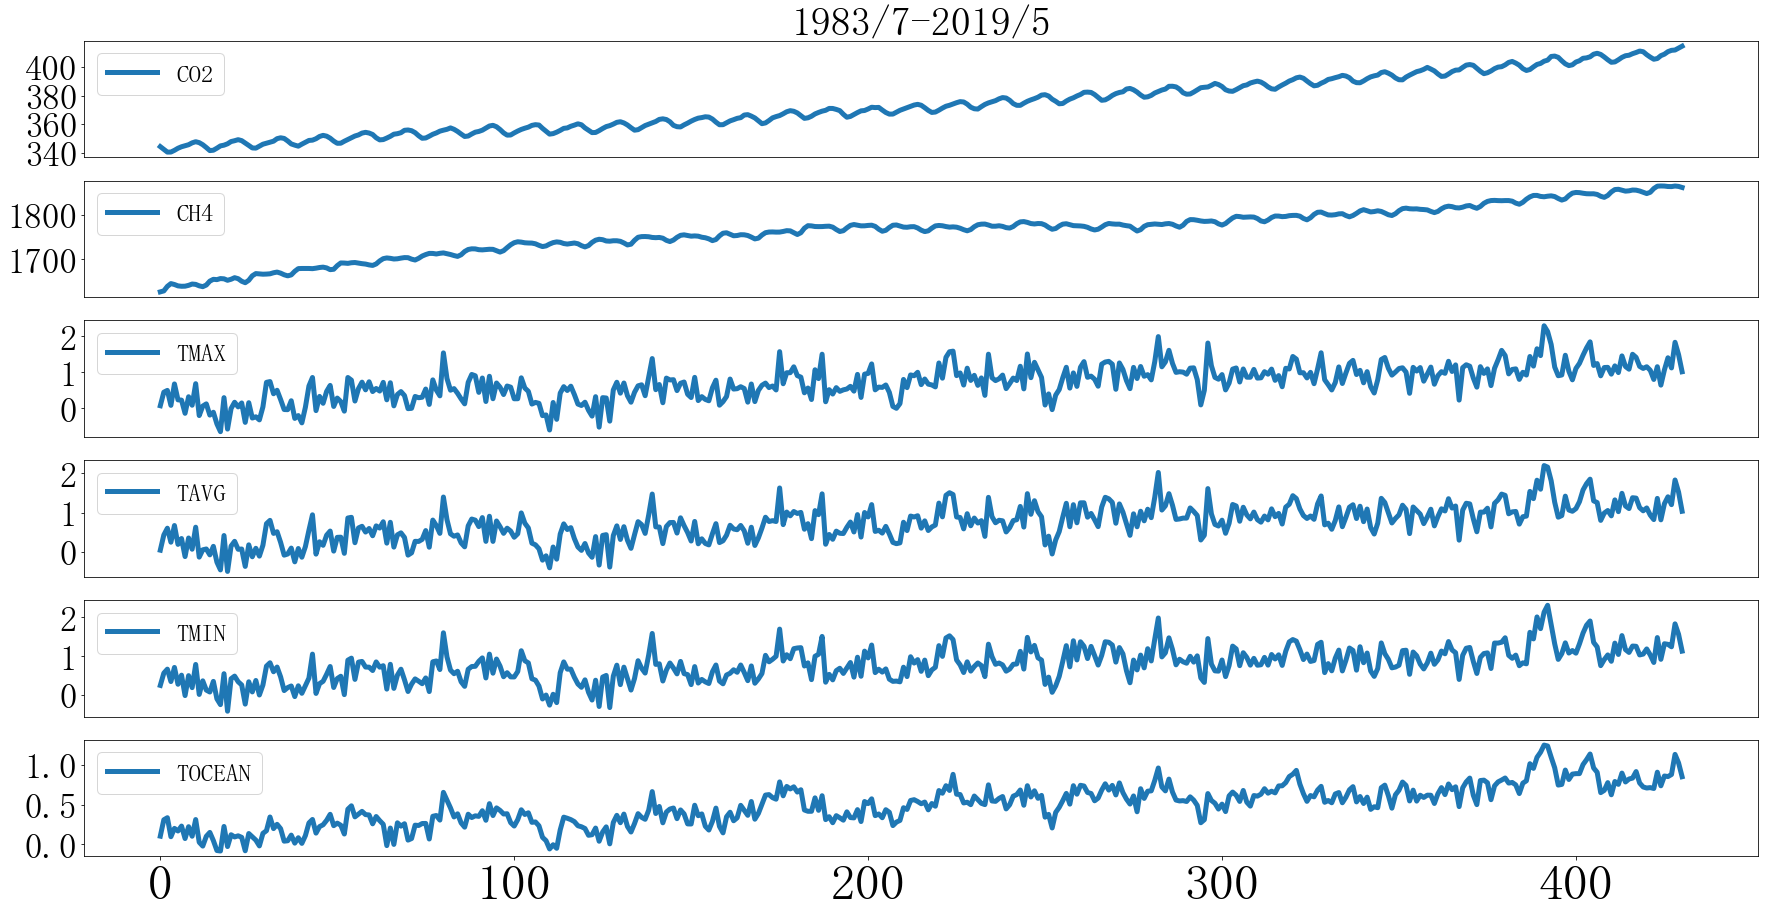

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

fig= pyplot.figure(figsize = (30,15))
for group in groups:
    
    plt.subplot(len(groups),1,i)
    i=i+1
    
    if i==2:
        plt.title("1983/7-2019/5",fontsize=40)
    if i!=len(groups)+1:
        plt.xticks([])
    else:
        pass
        
#         pyplot.plot(month,values[:, group])
#     else:
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)

    pyplot.plot(values[:, group],linewidth=5,label=dataset.columns[group])
    plt.legend(prop={'size':25})
#     pyplot.title(dataset.columns[group], loc='center')
    
#     pyplot.xlabel("time")
#     pyplot.ylabel("value",fontsize=25)
#     pyplot.xticks(rotation=90,fontsize=4)

pyplot.savefig("truth.png",dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=60
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


    var1(t-60)  var2(t-60)  var3(t-60)  var4(t-60)  var5(t-60)  var6(t-60)  \
60    0.051675    0.000000    0.244801    0.200890    0.243947    0.140285   
61    0.025838    0.009155    0.372656    0.344329    0.359868    0.294824   
62    0.000000    0.052018    0.389703    0.408451    0.397285    0.314329   
63    0.000404    0.078236    0.248210    0.276130    0.280264    0.135034   
64    0.016687    0.069496    0.450733    0.433655    0.413426    0.213803   

    var1(t-59)  var2(t-59)  var3(t-59)  var4(t-59)  ...  var3(t-1)  var4(t-1)  \
60    0.025838    0.009155    0.372656    0.344329  ...   0.471190   0.405486   
61    0.000000    0.052018    0.389703    0.408451  ...   0.378793   0.336916   
62    0.000404    0.078236    0.248210    0.276130  ...   0.407433   0.430319   
63    0.016687    0.069496    0.450733    0.433655  ...   0.383225   0.409563   
64    0.036334    0.056596    0.300375    0.255374  ...   0.465394   0.469236   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 371 samples, validate on 71 samples
Epoch 1/400
 - 3s - loss: 0.4836 - val_loss: 0.6075
Epoch 2/400
 - 0s - loss: 0.3579 - val_loss: 0.3063
Epoch 3/400
 - 0s - loss: 0.1774 - val_loss: 0.1133
Epoch 4/400
 - 0s - loss: 0.1258 - val_loss: 0.2179
Epoch 5/400
 - 0s - loss: 0.1376 - val_loss: 0.2204
Epoch 6/400
 - 0s - loss: 0.1157 - val_loss: 0.1196
Epoch 7/400
 - 0s - loss: 0.1051 - val_loss: 0.1467
Epoch 8/400
 - 0s - loss: 0.1011 - val_loss: 0.1354
Epoch 9/400
 - 0s - loss: 0.0913 - val_loss: 0.0972
Epoch 10/400
 - 0s - loss: 0.0846 - val_loss: 0.1090
Epoch 11/400
 - 0s - loss: 0.0807 - val_loss: 0.0908
Epoch 12/400
 - 0s - loss: 0.0775 - val_loss: 0.0762
Epoch 13/400
 - 0s - loss: 0.0756 - val_loss: 0.0688
Epoch 14/400
 - 0s - loss: 0.0735 - val_loss: 0.0720
Epoch 15/400
 - 0s - loss: 0.0725 - val_loss: 0.0754
Epoch 16/400
 - 0s - loss: 0.0704 - val_loss: 0.0

Epoch 144/400
 - 0s - loss: 0.0474 - val_loss: 0.0503
Epoch 145/400
 - 0s - loss: 0.0456 - val_loss: 0.0635
Epoch 146/400
 - 0s - loss: 0.0509 - val_loss: 0.0651
Epoch 147/400
 - 0s - loss: 0.0531 - val_loss: 0.0512
Epoch 148/400
 - 0s - loss: 0.0464 - val_loss: 0.0490
Epoch 149/400
 - 0s - loss: 0.0448 - val_loss: 0.0522
Epoch 150/400
 - 0s - loss: 0.0447 - val_loss: 0.0476
Epoch 151/400
 - 0s - loss: 0.0450 - val_loss: 0.0498
Epoch 152/400
 - 0s - loss: 0.0444 - val_loss: 0.0475
Epoch 153/400
 - 0s - loss: 0.0438 - val_loss: 0.0483
Epoch 154/400
 - 0s - loss: 0.0450 - val_loss: 0.0545
Epoch 155/400
 - 0s - loss: 0.0453 - val_loss: 0.0544
Epoch 156/400
 - 0s - loss: 0.0440 - val_loss: 0.0495
Epoch 157/400
 - 0s - loss: 0.0431 - val_loss: 0.0504
Epoch 158/400
 - 0s - loss: 0.0433 - val_loss: 0.0564
Epoch 159/400
 - 0s - loss: 0.0461 - val_loss: 0.0515
Epoch 160/400
 - 0s - loss: 0.0425 - val_loss: 0.0447
Epoch 161/400
 - 0s - loss: 0.0423 - val_loss: 0.0456
Epoch 162/400
 - 0s - loss: 

Epoch 296/400
 - 0s - loss: 0.0397 - val_loss: 0.0613
Epoch 297/400
 - 0s - loss: 0.0375 - val_loss: 0.0489
Epoch 298/400
 - 0s - loss: 0.0399 - val_loss: 0.0482
Epoch 299/400
 - 0s - loss: 0.0408 - val_loss: 0.0502
Epoch 300/400
 - 0s - loss: 0.0404 - val_loss: 0.0395
Epoch 301/400
 - 0s - loss: 0.0405 - val_loss: 0.0397
Epoch 302/400
 - 0s - loss: 0.0381 - val_loss: 0.0457
Epoch 303/400
 - 0s - loss: 0.0362 - val_loss: 0.0402
Epoch 304/400
 - 0s - loss: 0.0348 - val_loss: 0.0427
Epoch 305/400
 - 0s - loss: 0.0333 - val_loss: 0.0350
Epoch 306/400
 - 0s - loss: 0.0310 - val_loss: 0.0388
Epoch 307/400
 - 0s - loss: 0.0322 - val_loss: 0.0436
Epoch 308/400
 - 0s - loss: 0.0358 - val_loss: 0.0447
Epoch 309/400
 - 0s - loss: 0.0357 - val_loss: 0.0459
Epoch 310/400
 - 0s - loss: 0.0370 - val_loss: 0.0495
Epoch 311/400
 - 0s - loss: 0.0394 - val_loss: 0.0489
Epoch 312/400
 - 0s - loss: 0.0389 - val_loss: 0.0523
Epoch 313/400
 - 0s - loss: 0.0383 - val_loss: 0.0503
Epoch 314/400
 - 0s - loss: 

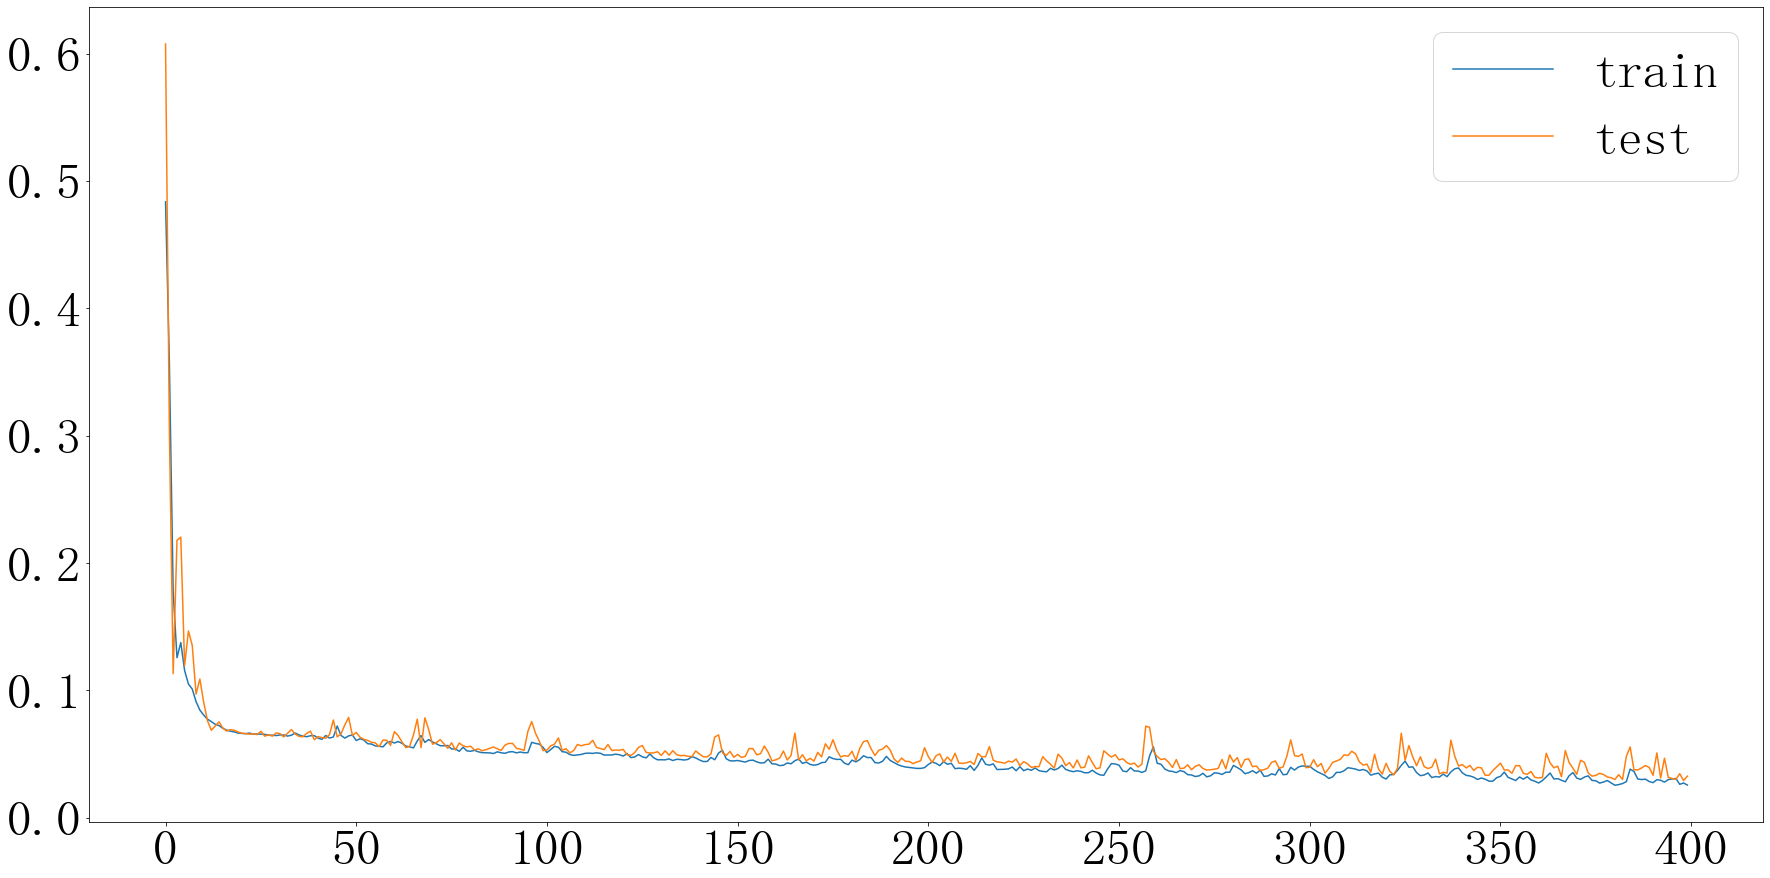

In [3]:
# 设计网络
model2 = Sequential()
model2.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model2.add(LSTM(200,return_sequences=True))
# model.add(LSTM(200,return_sequences=True))
model2.add(LSTM(100,return_sequences=False))
model2.add(Dense(100))
model2.add(Dense(feature))
model2.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model2.fit(np.vstack((train_X,test_X)), np.vstack((train_y,test_y)), epochs=400, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size':50})

# plt.savefig('loss.png')
pyplot.show()

In [4]:
#预测未来25年
alltime=12*25
# test_25=test_X[-1:,:]
# print(test_25)

pred_x=test_y[-n_in:,:].reshape(1,1,n_in*feature)
print(pred_x.shape)
import copy

# print(pred_y[-1,:].shape)
pred_y=np.zeros((1,feature))
for i in range(alltime):
    tmp=model2.predict(pred_x)
    pred_x[0,0,:-feature]=pred_x[0,0,feature:]
    pred_x[0,0,-feature:]=copy.deepcopy(tmp[0,:])
#     print(pred_y.shape,tmp.shape)
    pred_y=np.vstack((pred_y,copy.deepcopy(tmp)))
    
pred_y=pred_y[1:,:]
print(pred_y.shape)
print(pred_y)
    

#     pre=pre.reshape(1,1,(pre.shape[-1]))
#     pred_y=np.vstack((pred_y,pre))
    

(1, 1, 360)
(300, 6)
[[0.97327679 0.94563746 0.5737164  0.55224854 0.50701642 0.58813614]
 [0.93737149 0.95382804 0.64757621 0.64932692 0.60707361 0.70158052]
 [0.91557699 0.96005821 0.59121156 0.59919512 0.55299193 0.66917479]
 ...
 [1.0318867  1.11521935 0.66289216 0.70478266 0.66231728 0.78434241]
 [1.03206396 1.11468101 0.66638684 0.70787793 0.6650421  0.78661406]
 [1.03228068 1.11397243 0.66313785 0.70394468 0.66112584 0.78288186]]


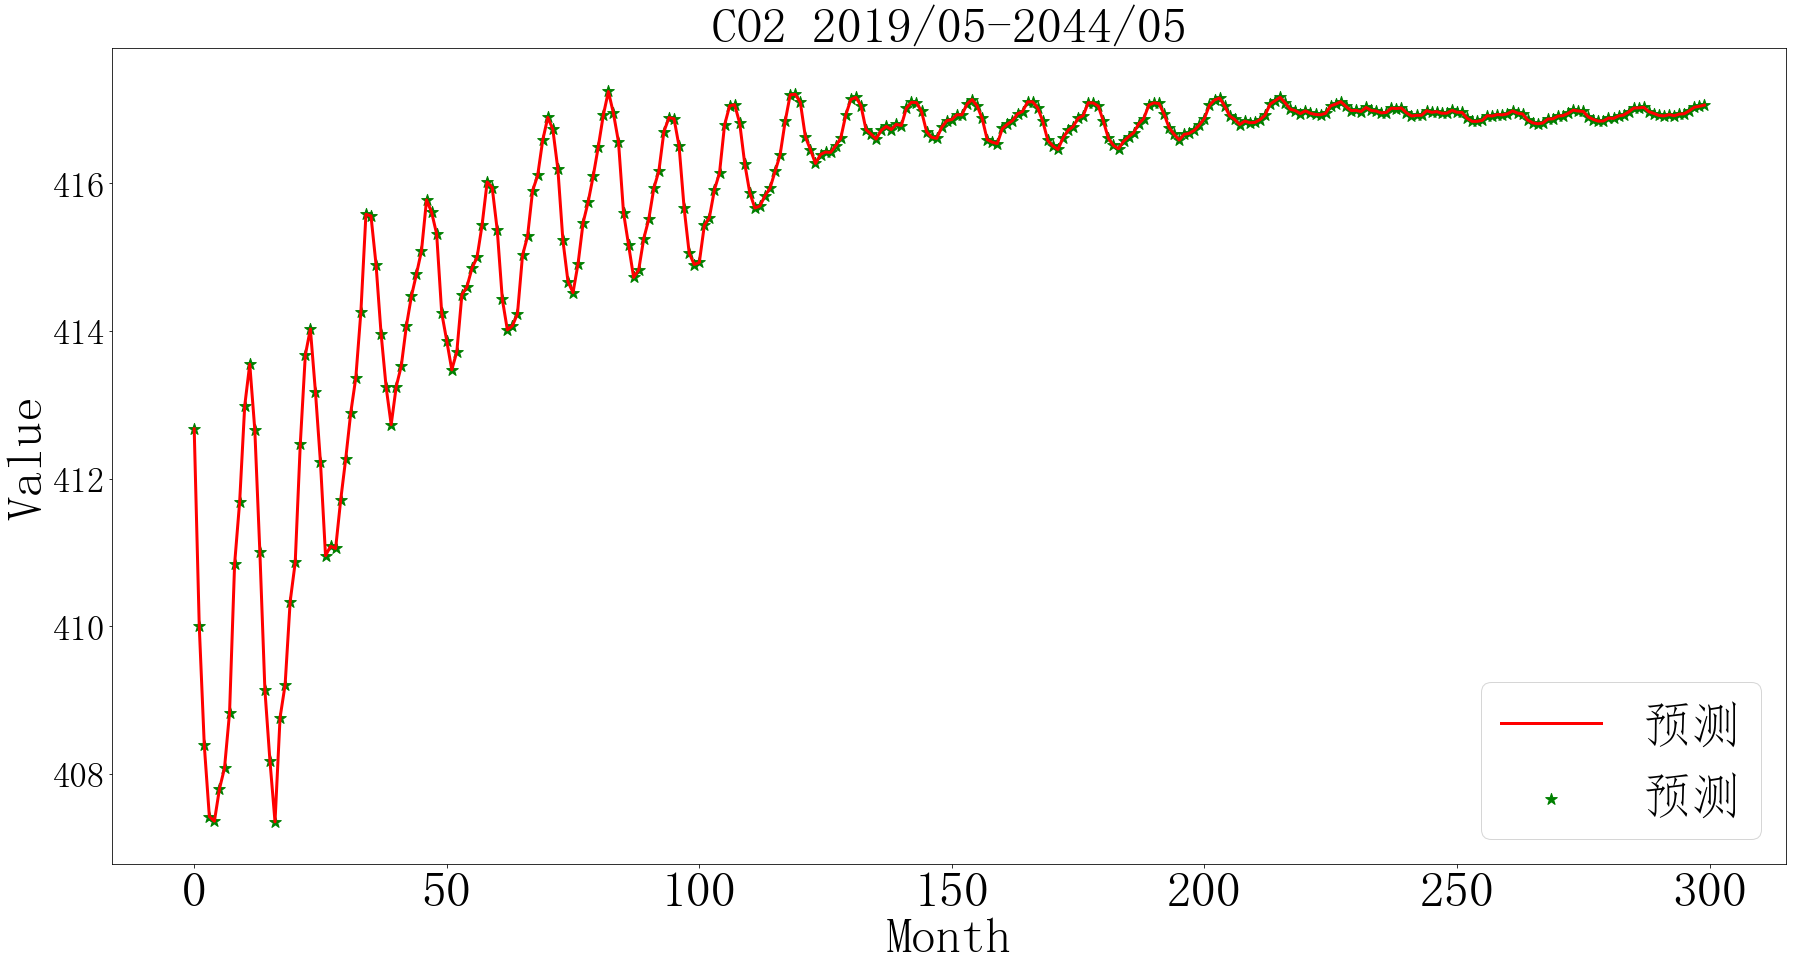

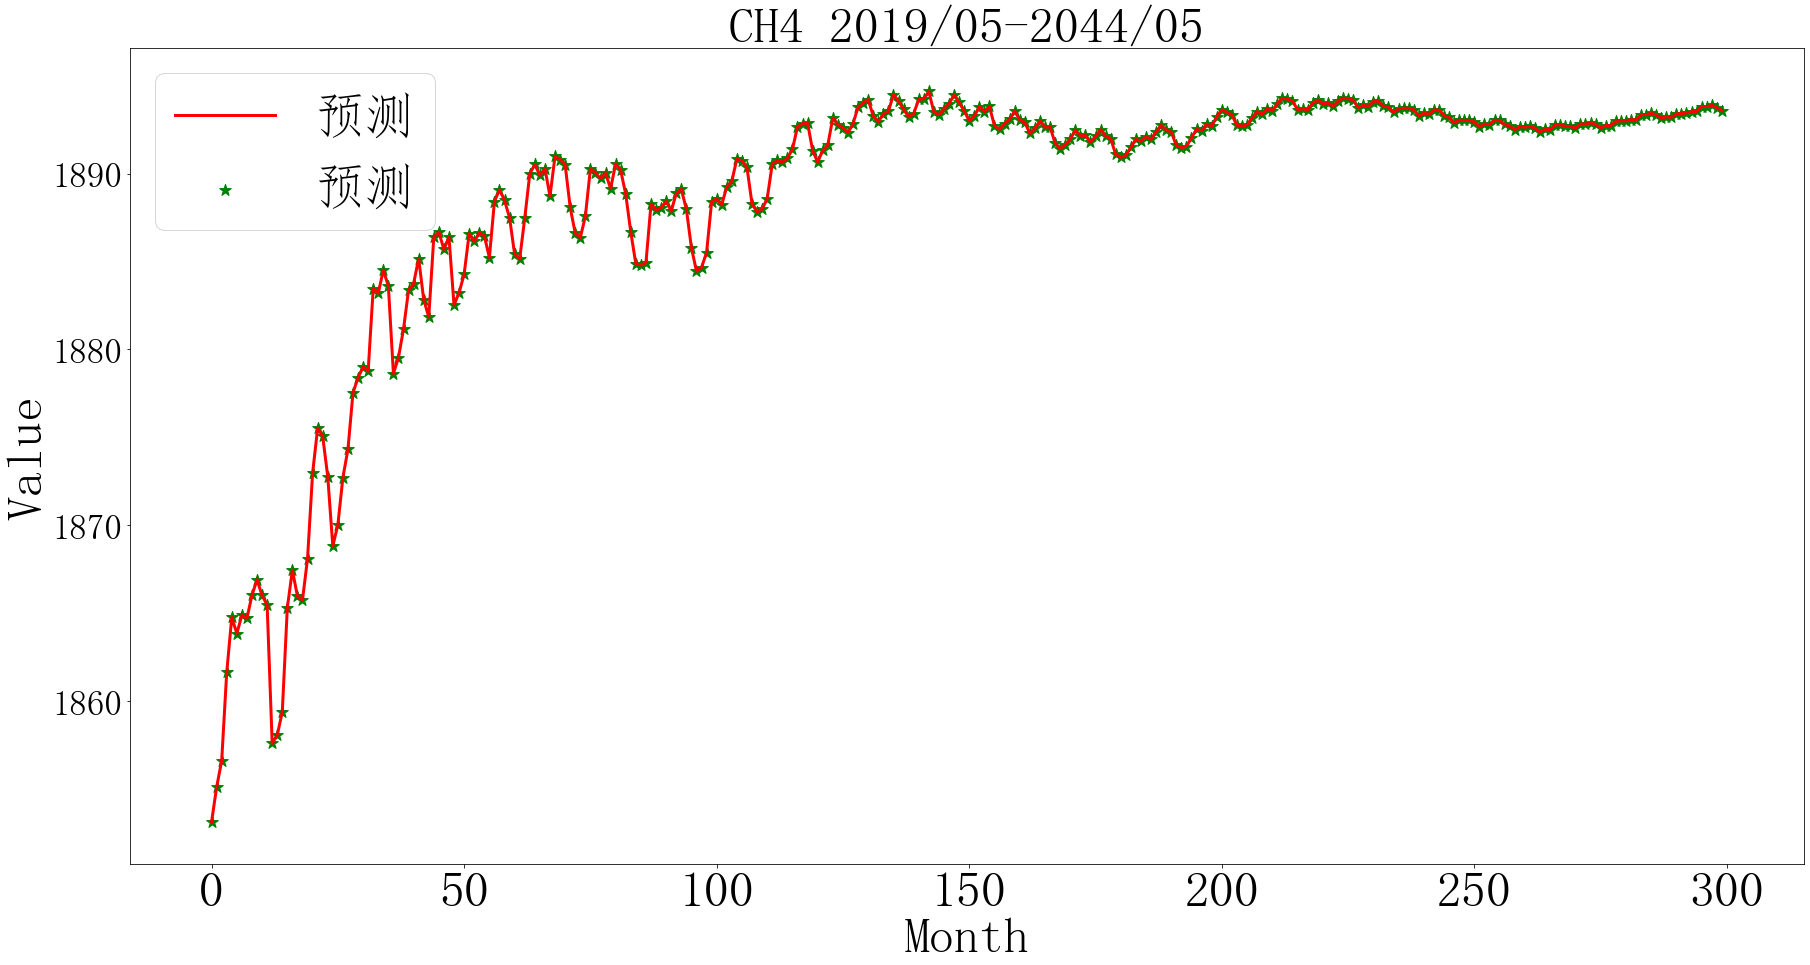

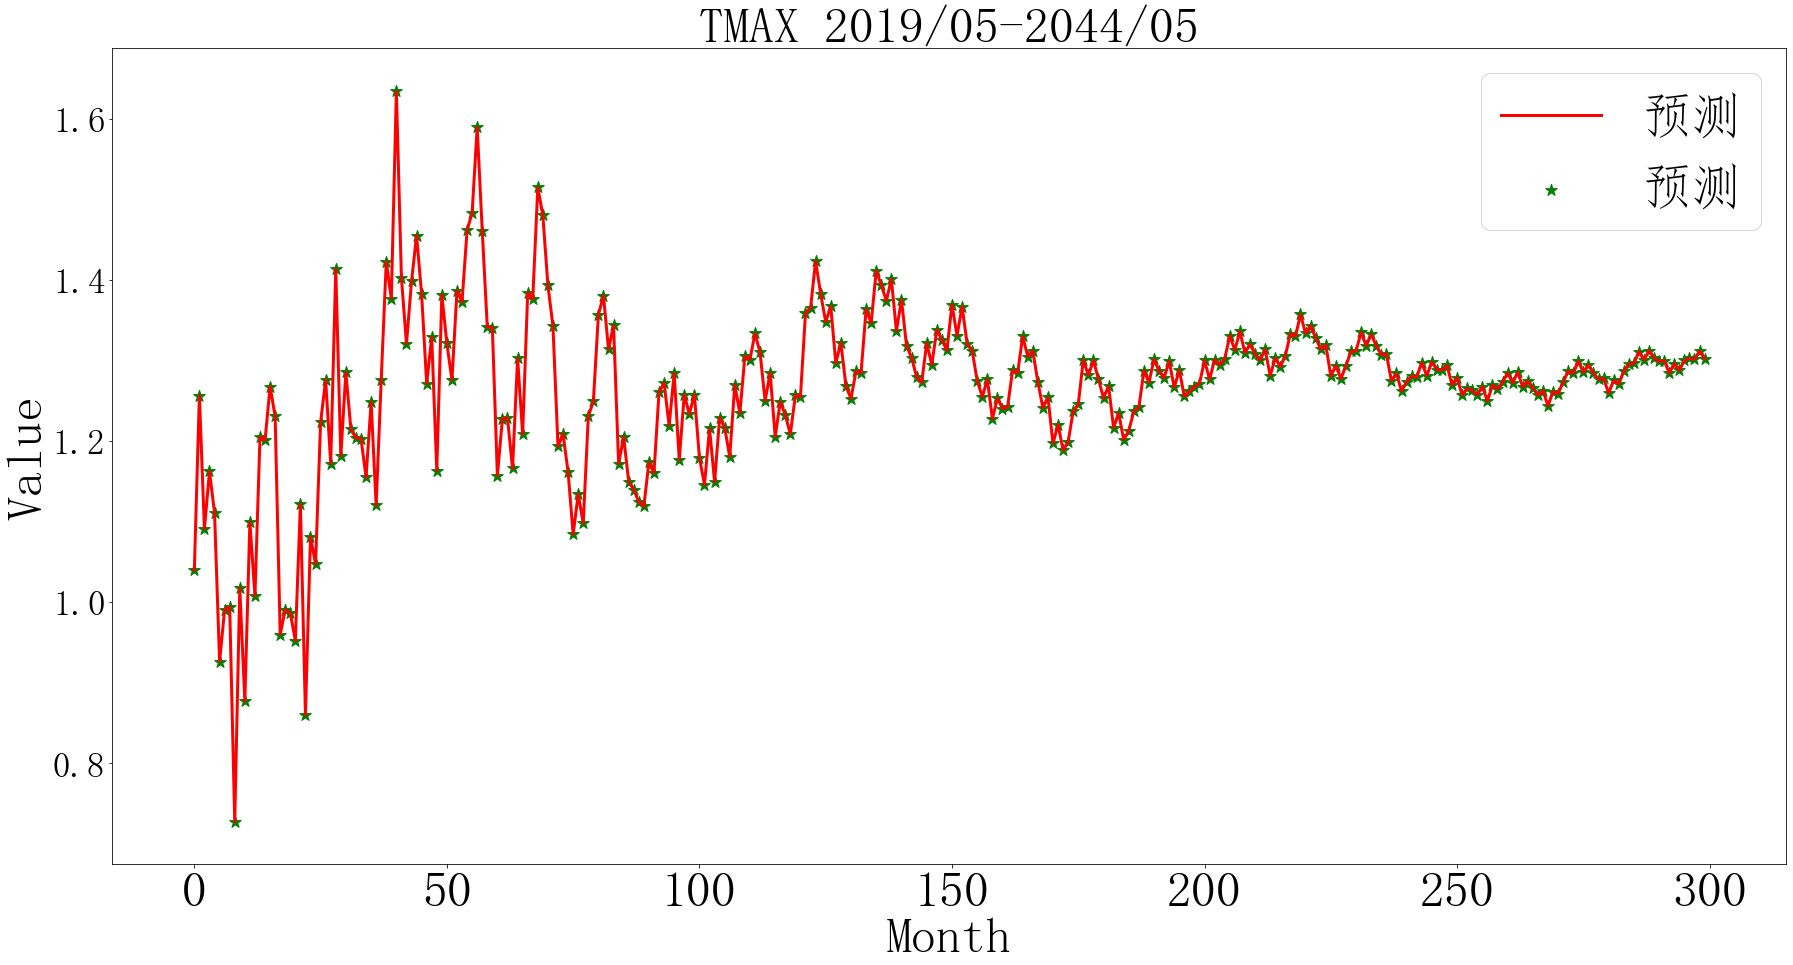

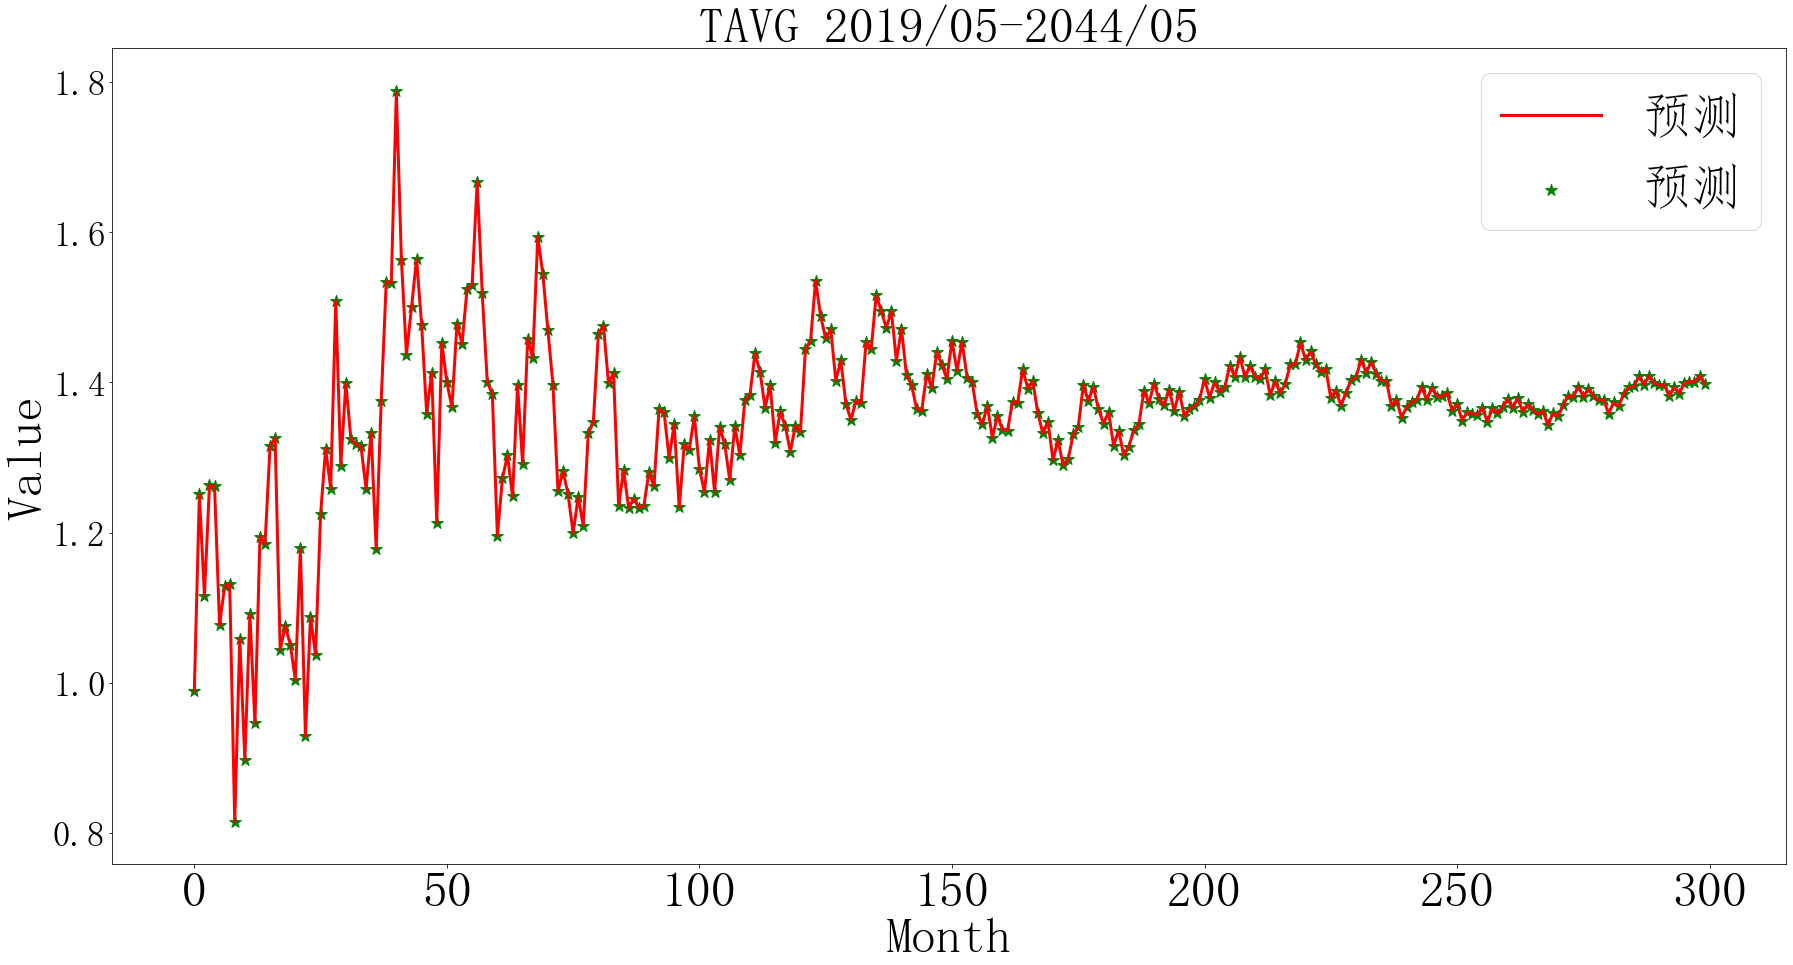

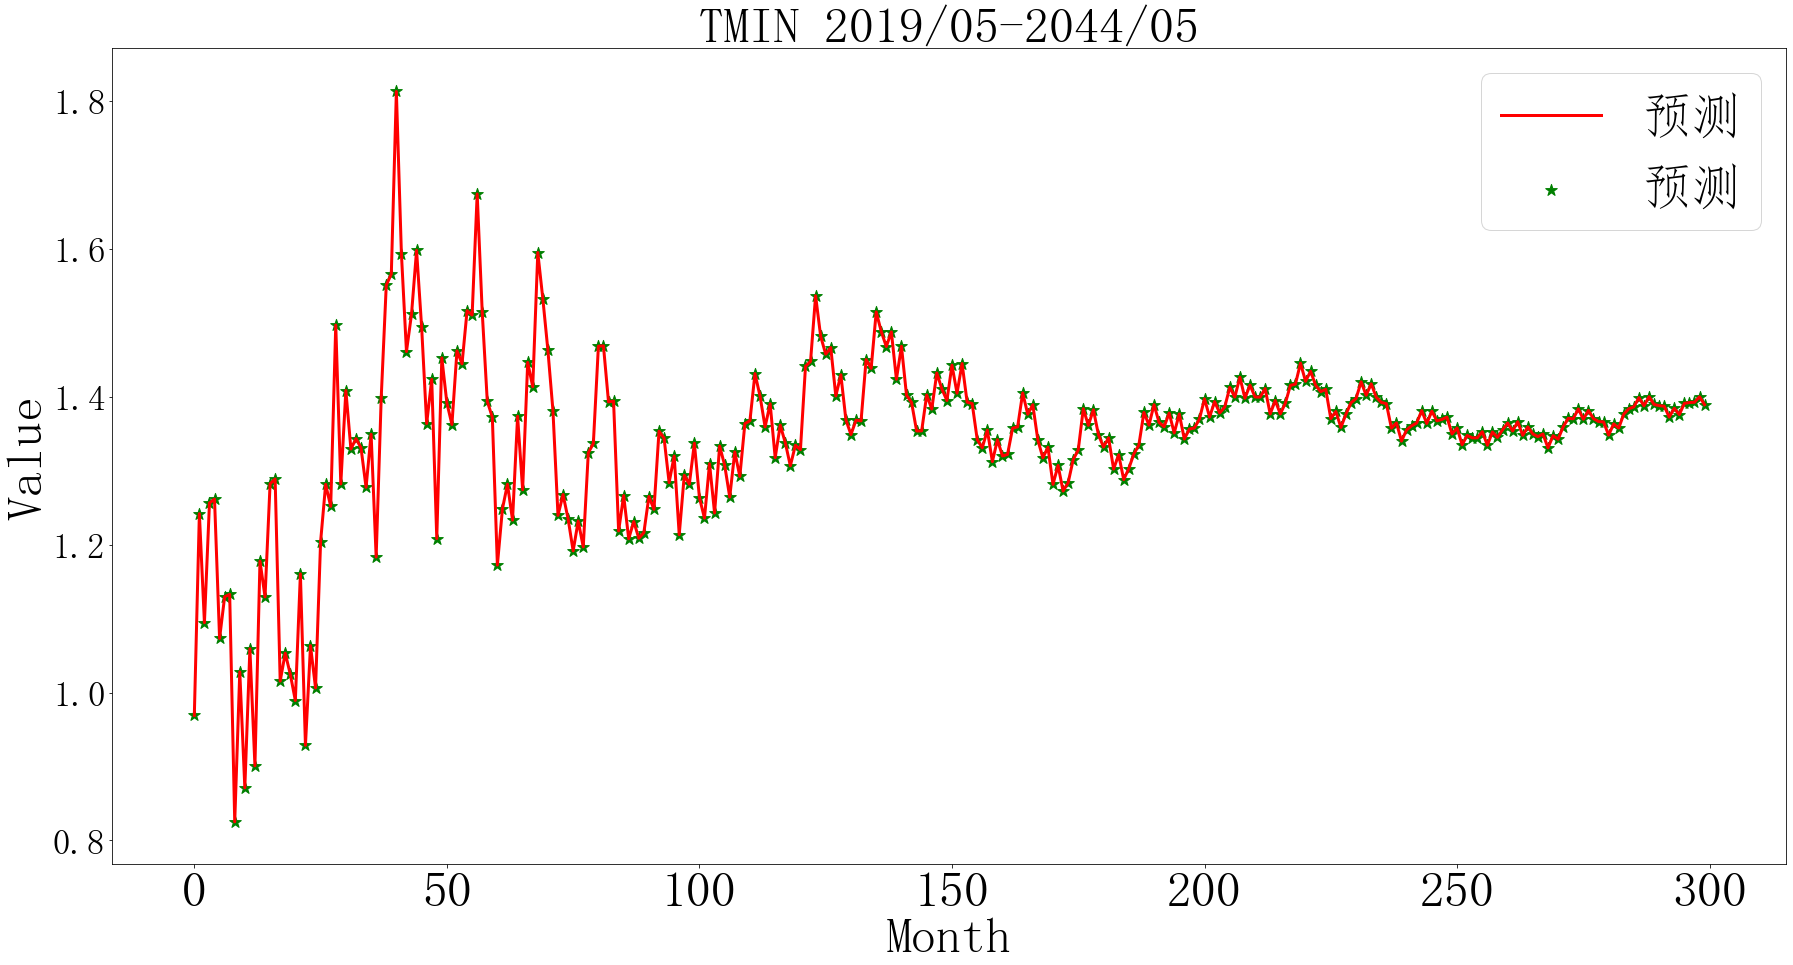

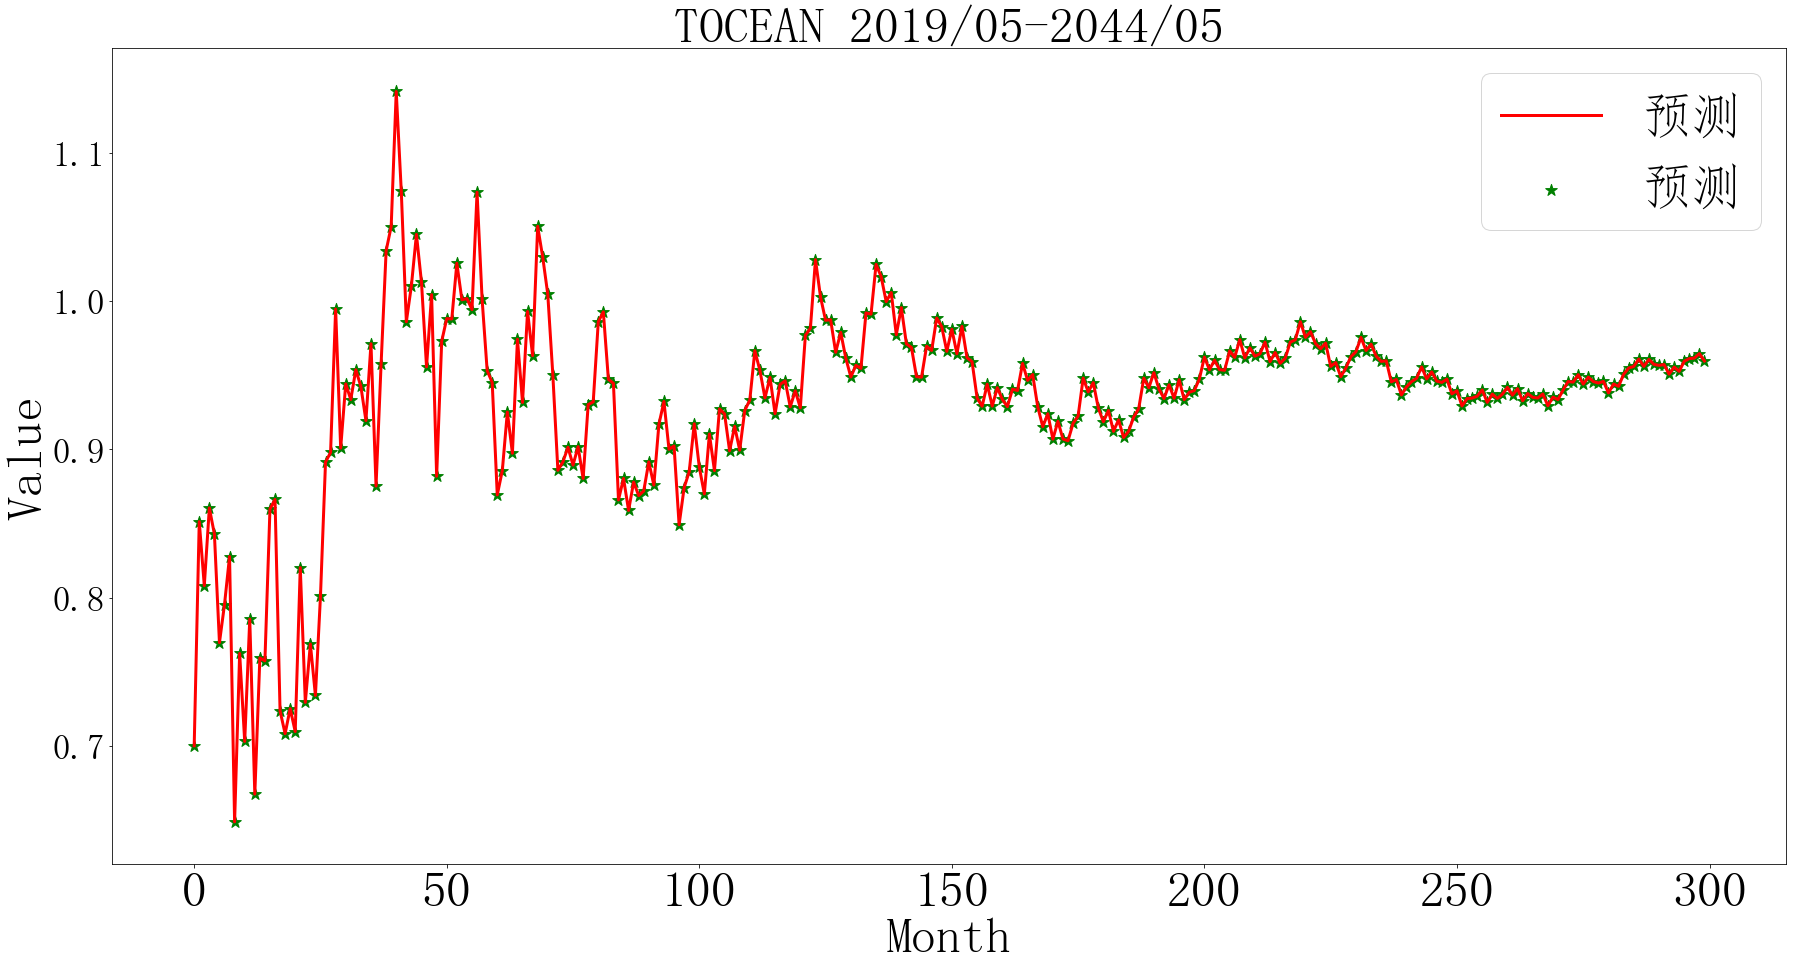

In [5]:


inv_pred_y = scaler.inverse_transform(pred_y)
x=np.zeros((len(inv_pred_y),1))
for i in range(len(x)):
    x[i]=i
           

for i in groups:
    # 绘制历史数据和预测数据图
    
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_pred_y[:,i-1],label='预测',c='r',linestyle='-', linewidth=3)
    plt.scatter(x,inv_pred_y[:,i-1],label='预测',c='g',linestyle='-', marker='*',s=150)
    plt.legend(prop={'size':50})
    
    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
    plt.xlabel("Month",fontsize=50)
    plt.ylabel("Value",fontsize=50)
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)
#     plt.title(fontdict=50)
    plt.savefig('{}25year.png'.format(dataset.columns[i]),dpi=200)
    plt.show()
    # 计算RMSE


(75, 1) (75, 6)


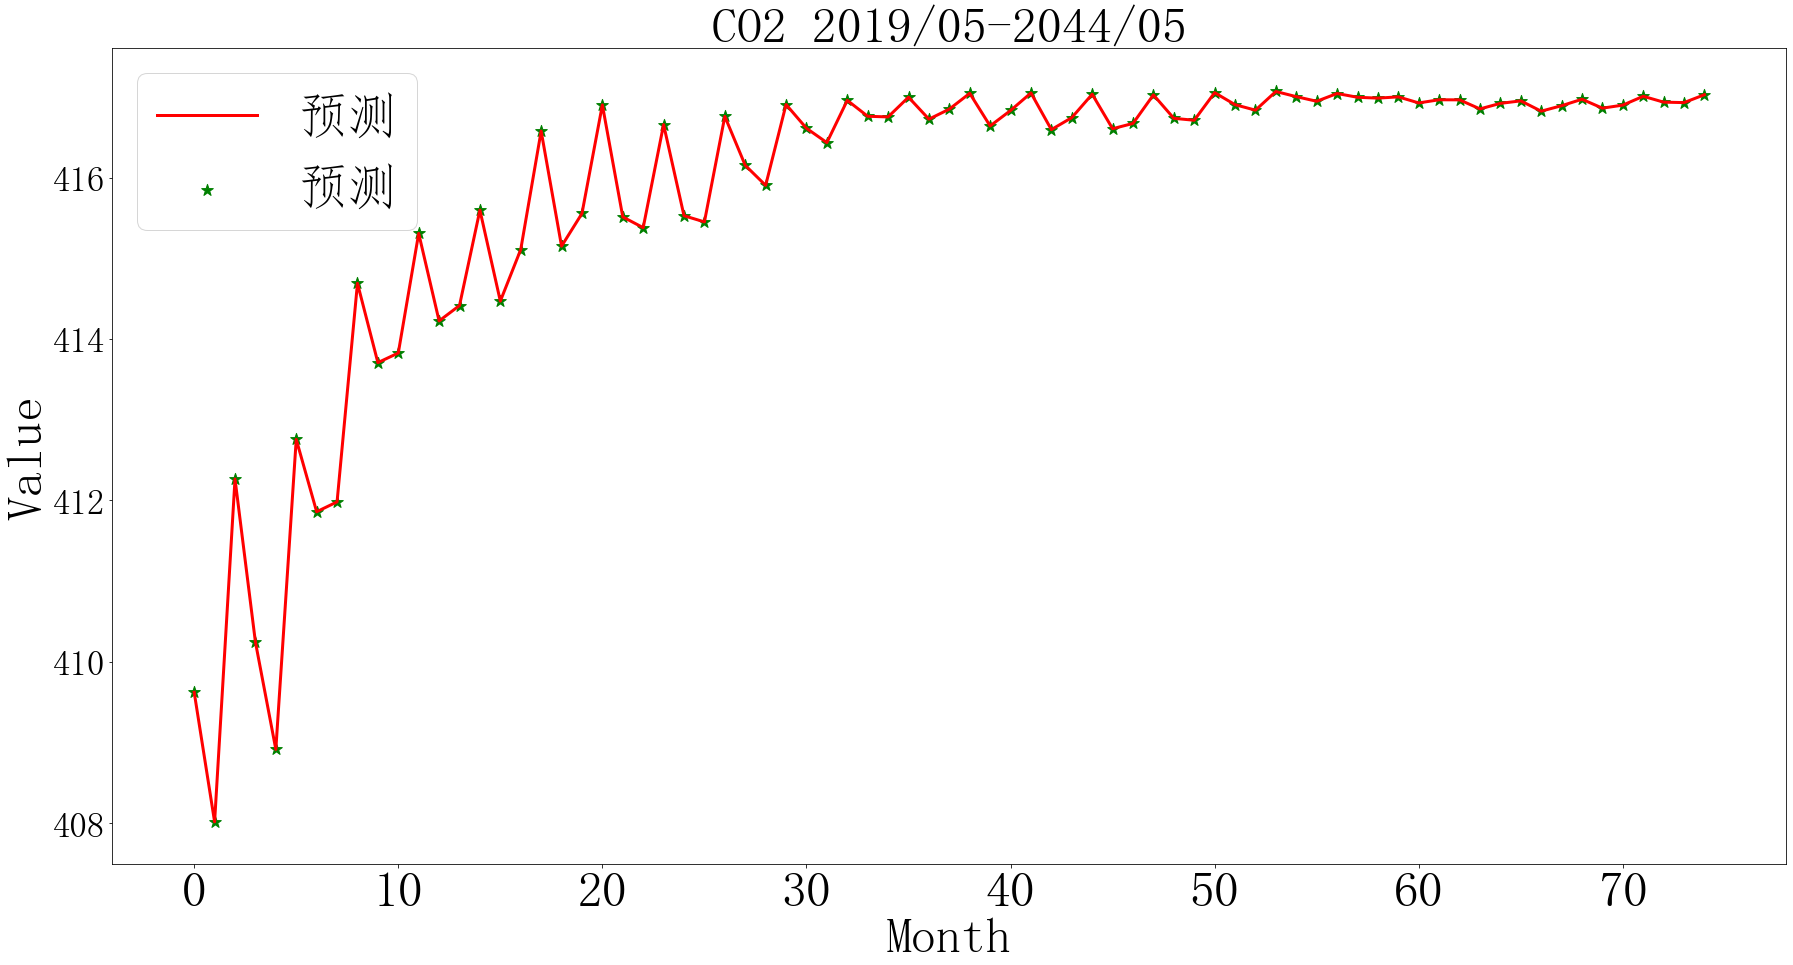

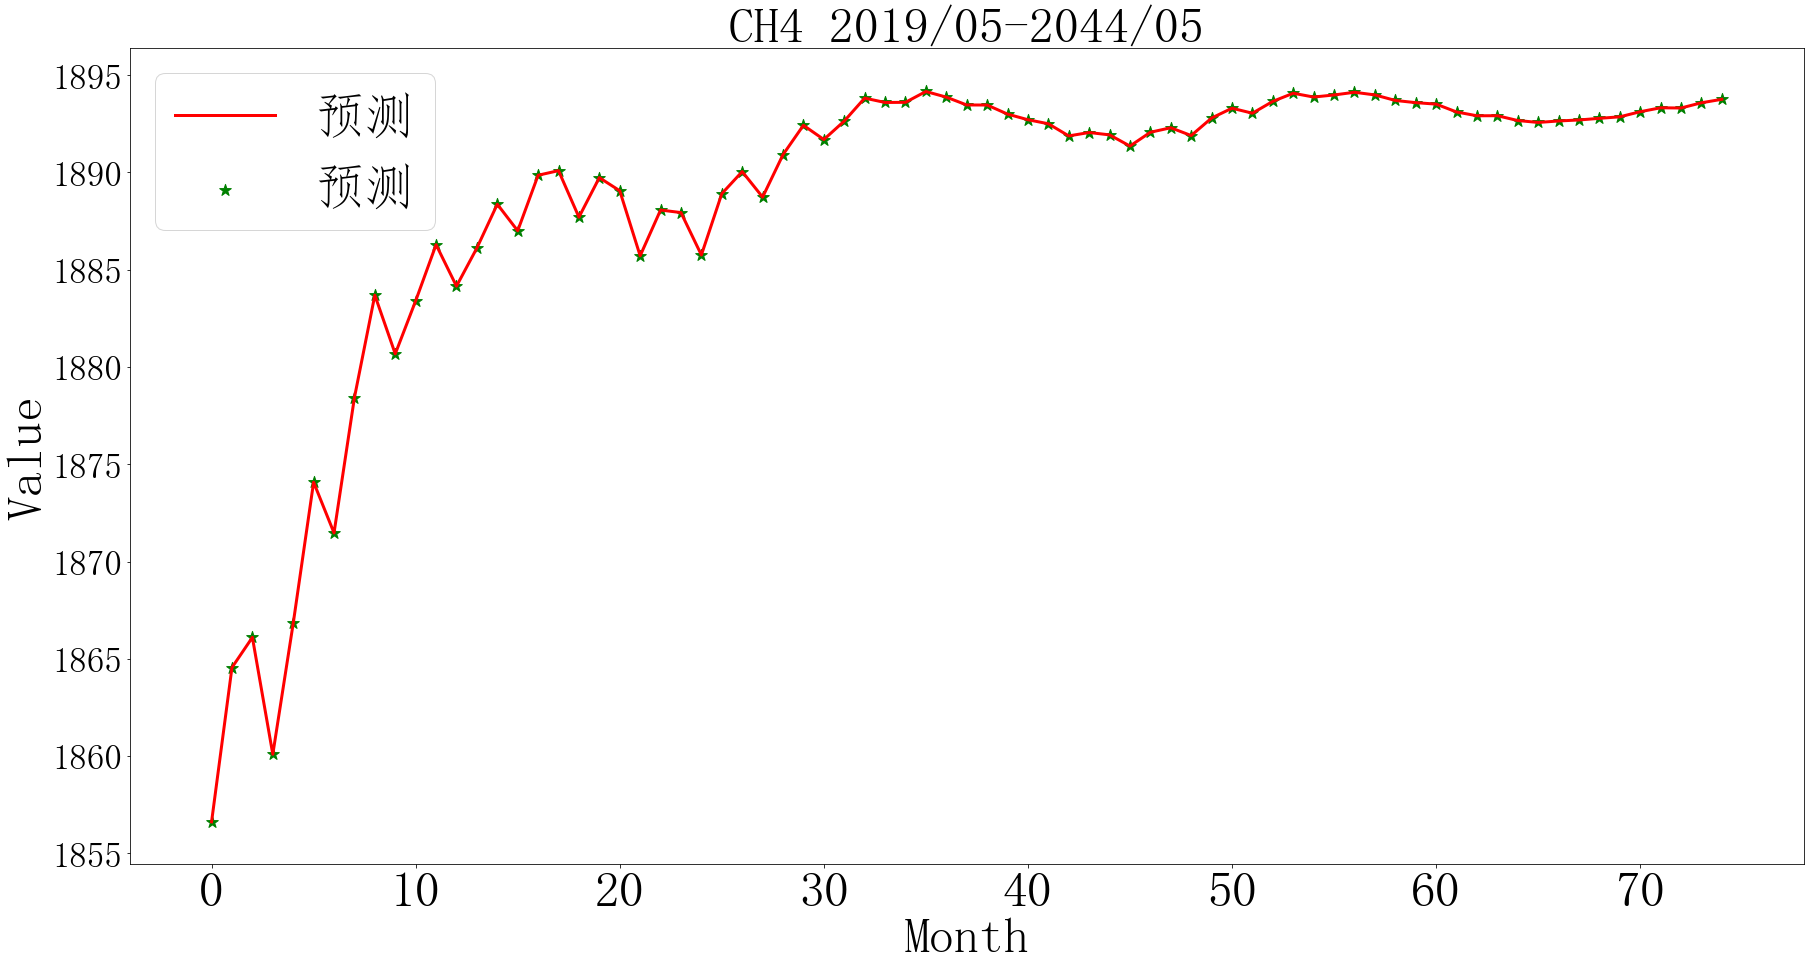

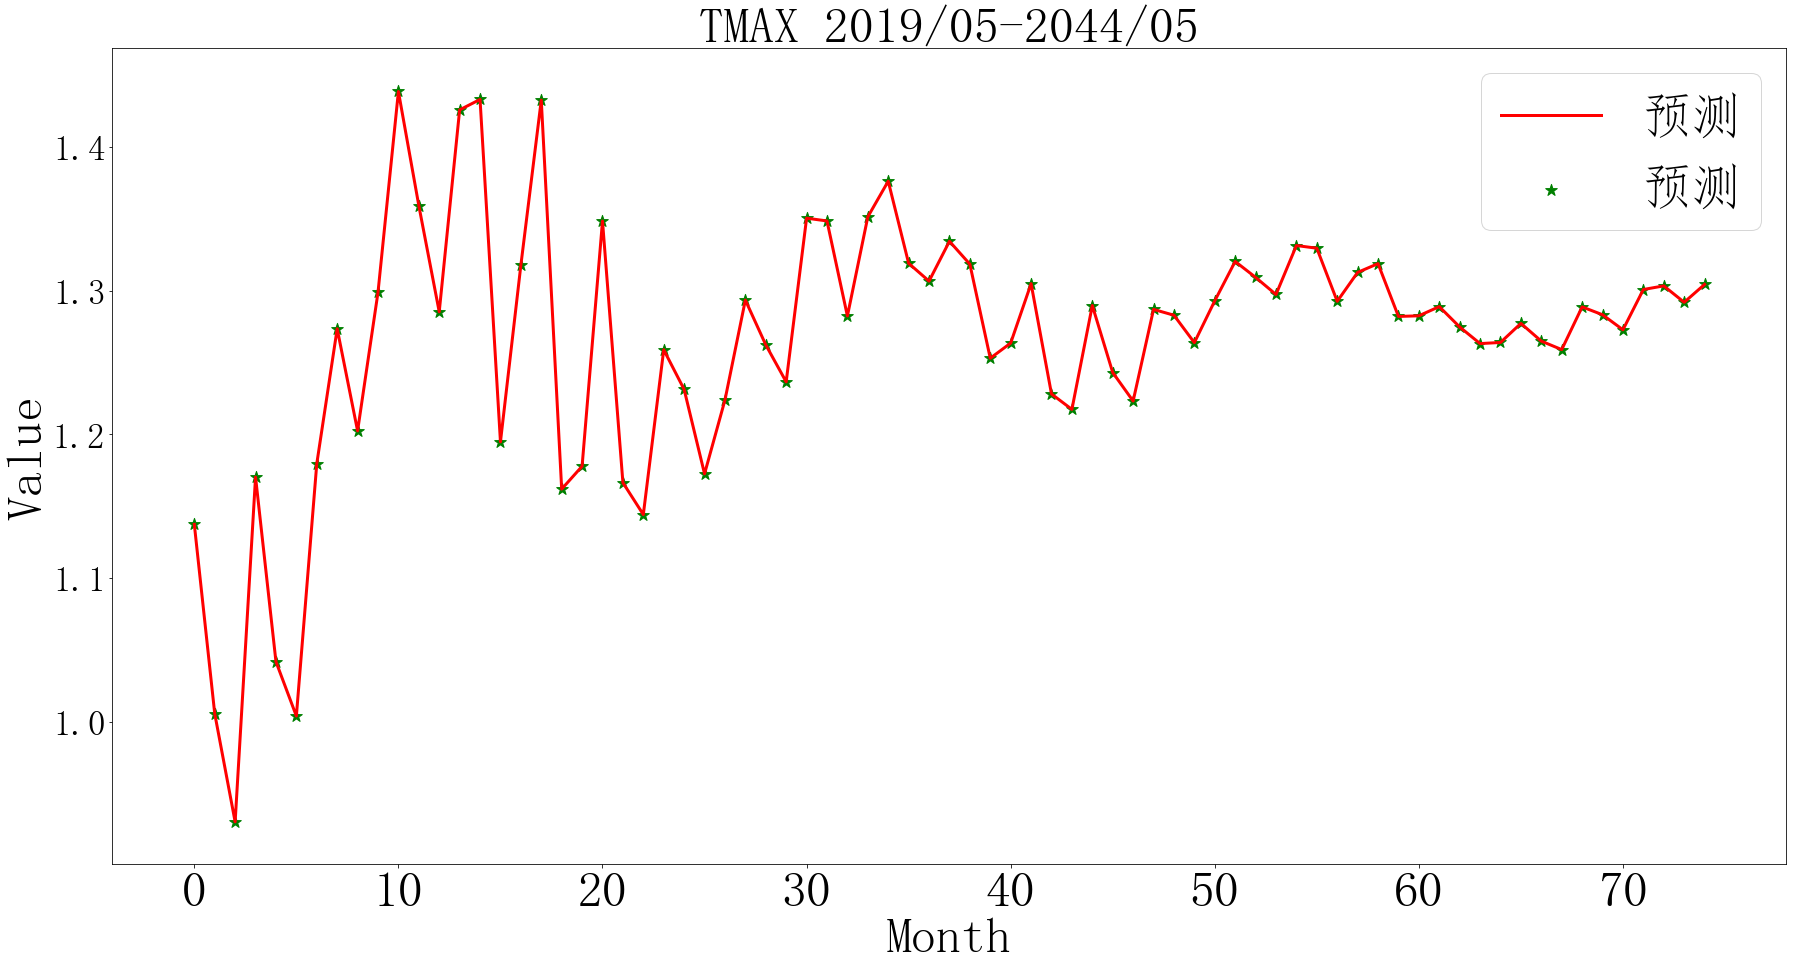

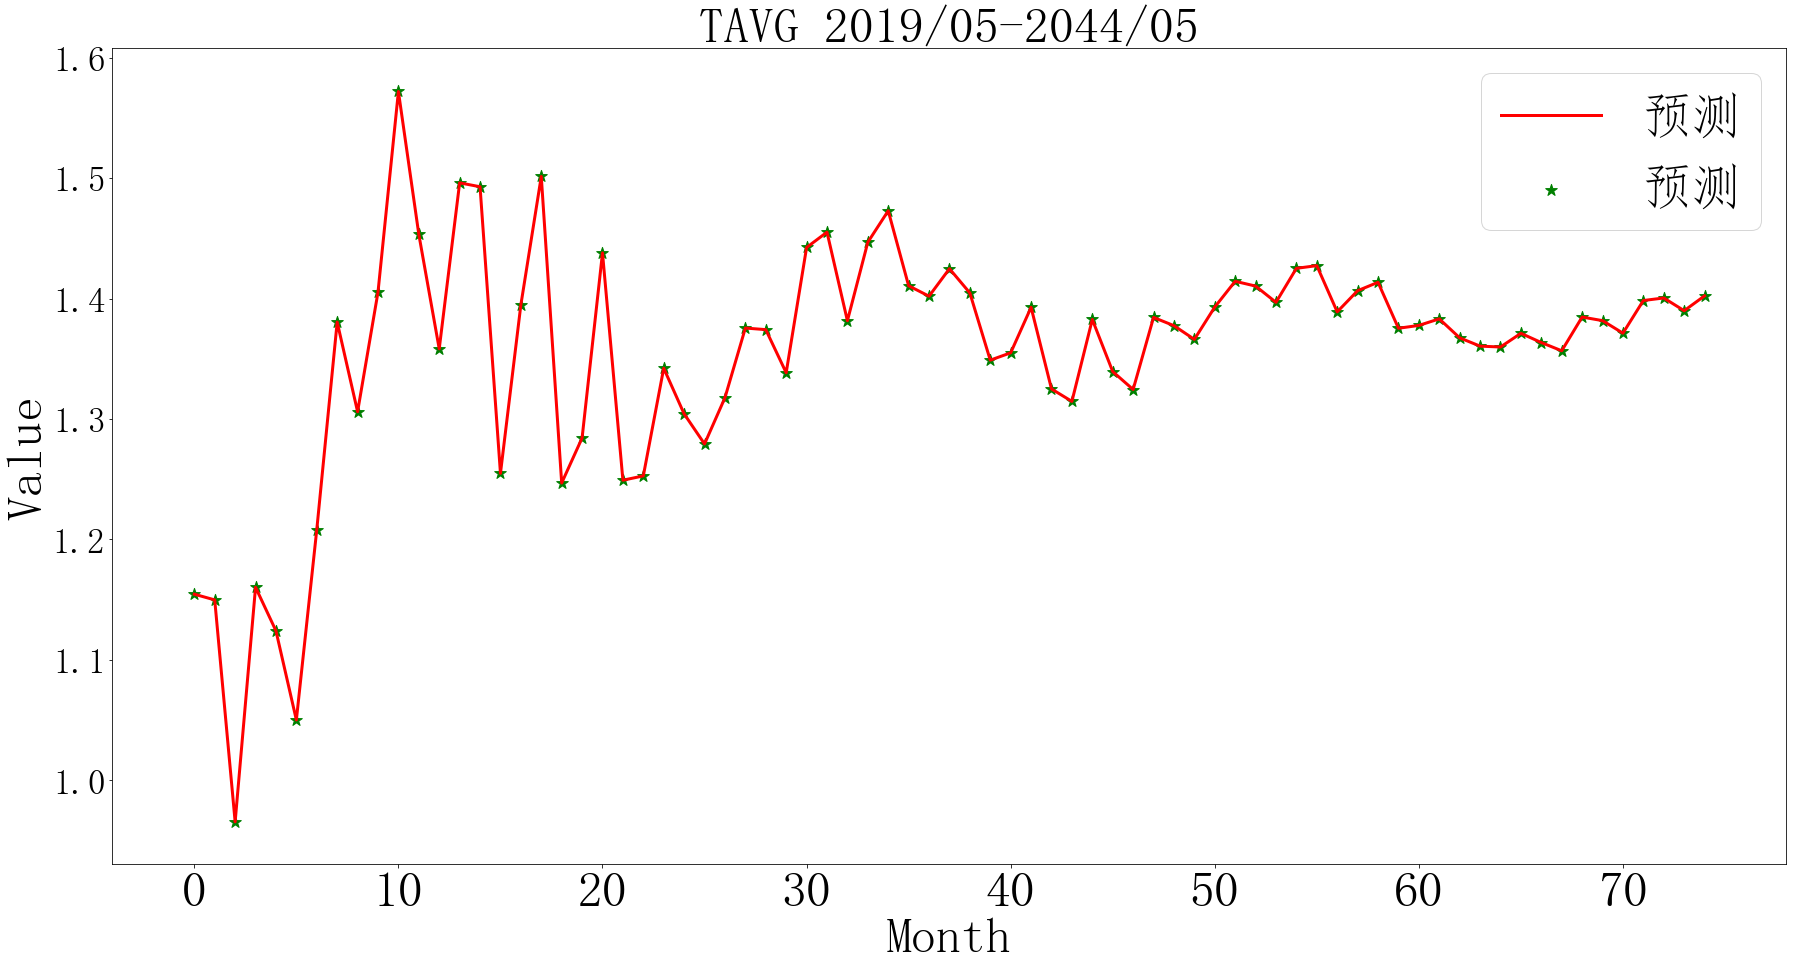

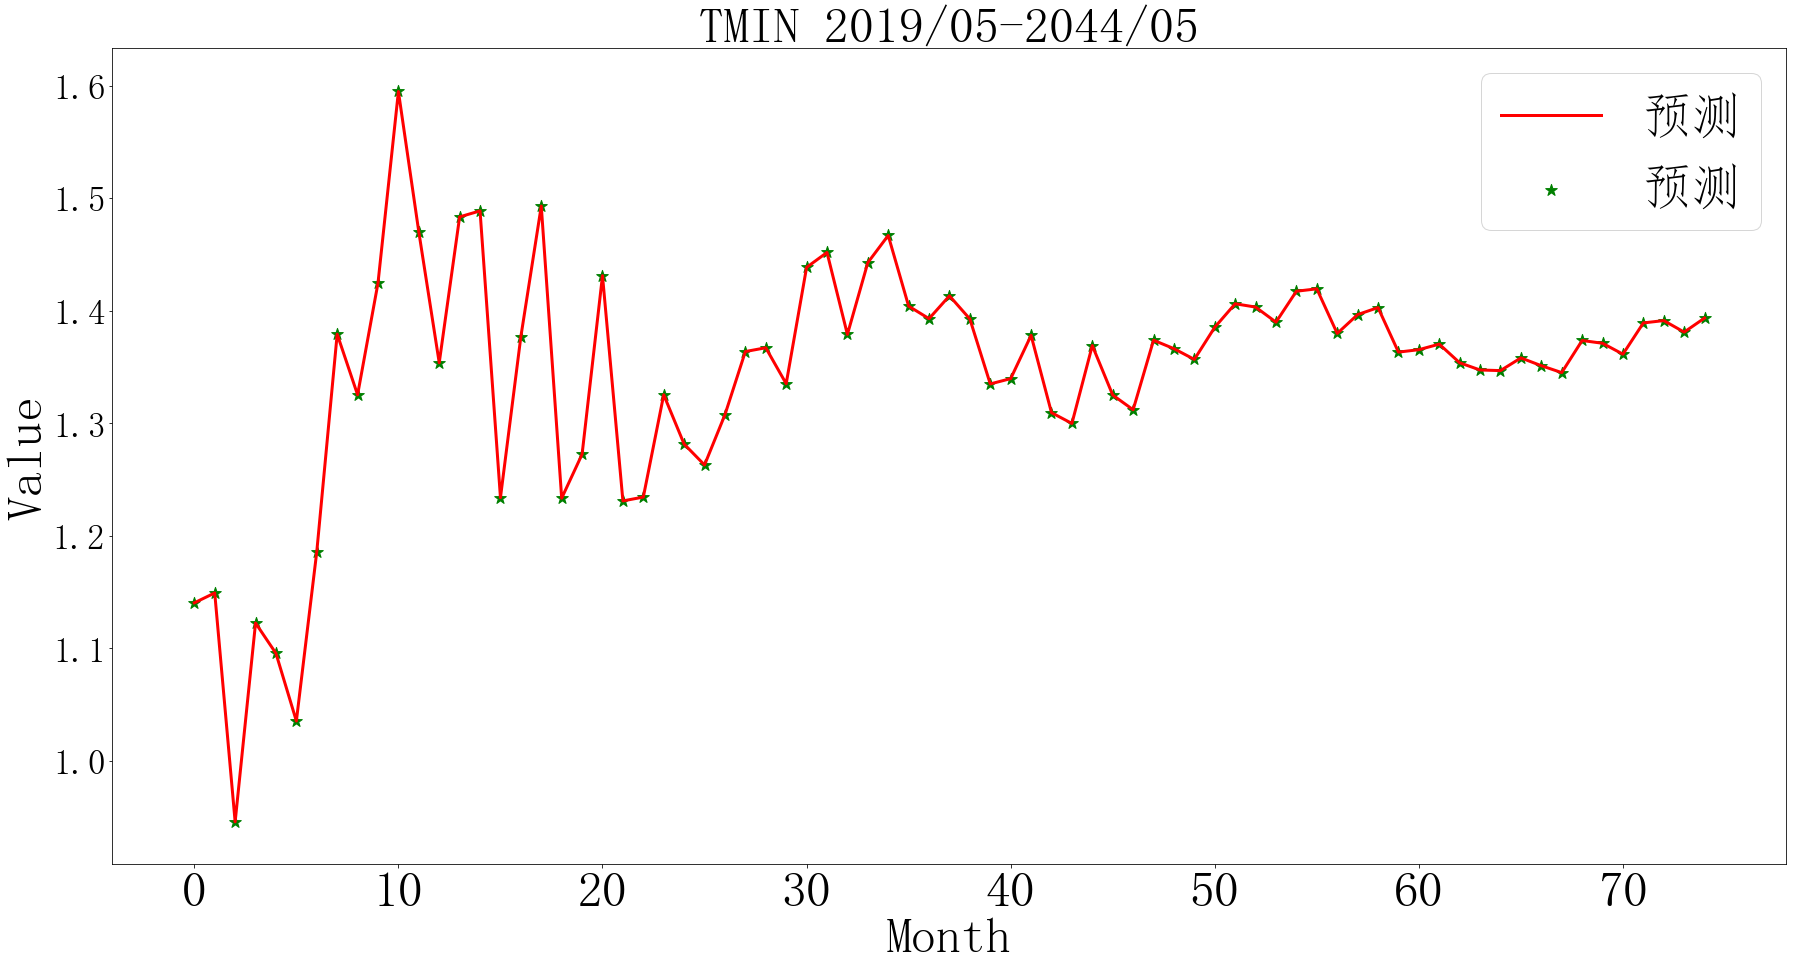

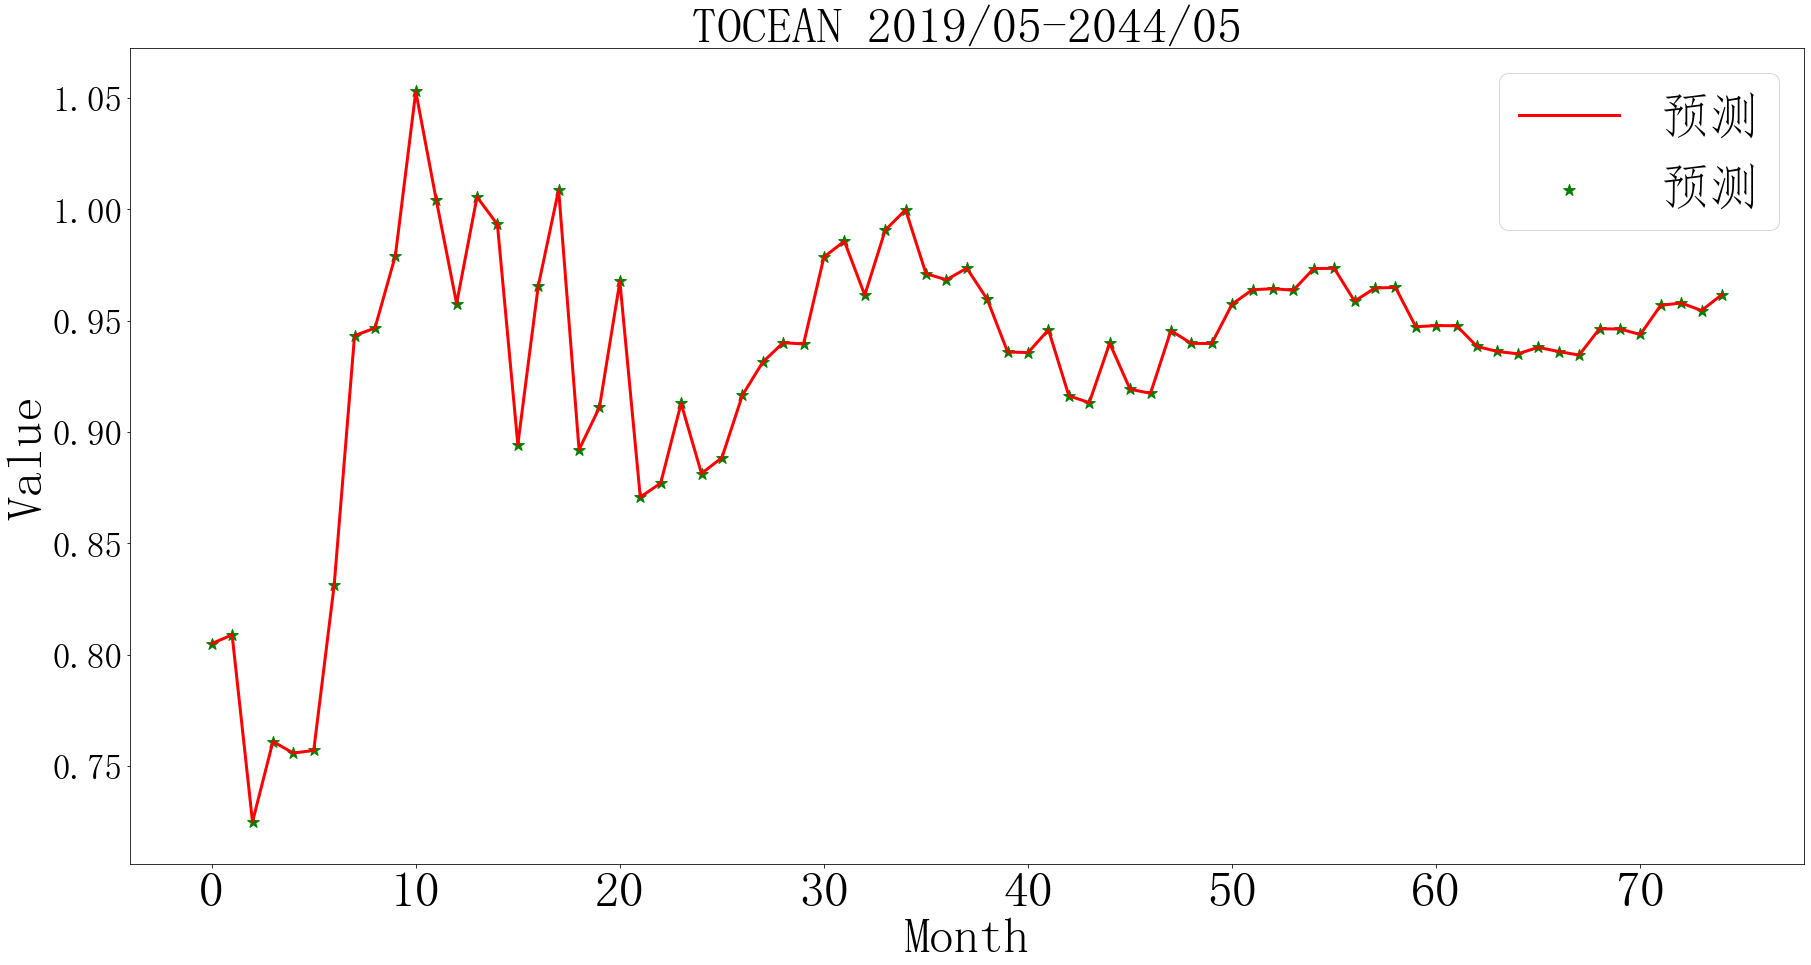

In [17]:
x=np.zeros((len(inv_pred_y)//4,1))
for i in range(len(x)):
    x[i]=i
y=np.zeros((inv_pred_y.shape[0]//4,inv_pred_y.shape[1]))

for i in range(0,300,4):
    y[i//4]=np.mean(inv_pred_y[i:i+4,:],axis=0)

print(x.shape,y.shape)
for i in groups:
    # 绘制历史数据和预测数据图
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(y[:,i-1],label='预测',c='r',linestyle='-', linewidth=3)
    plt.scatter(x,y[:,i-1],label='预测',c='g',linestyle='-', marker='*',s=150)
    plt.legend(prop={'size':50})

    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
    plt.xlabel("",fontsize=50)
    plt.ylabel("Value",fontsize=50)
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)
#     plt.title(fontdict=50)
    plt.savefig('{}25jidu.png'.format(dataset.columns[i]),dpi=200)
    plt.show()
# 计算RMSE
    

(25, 1) (25, 6)


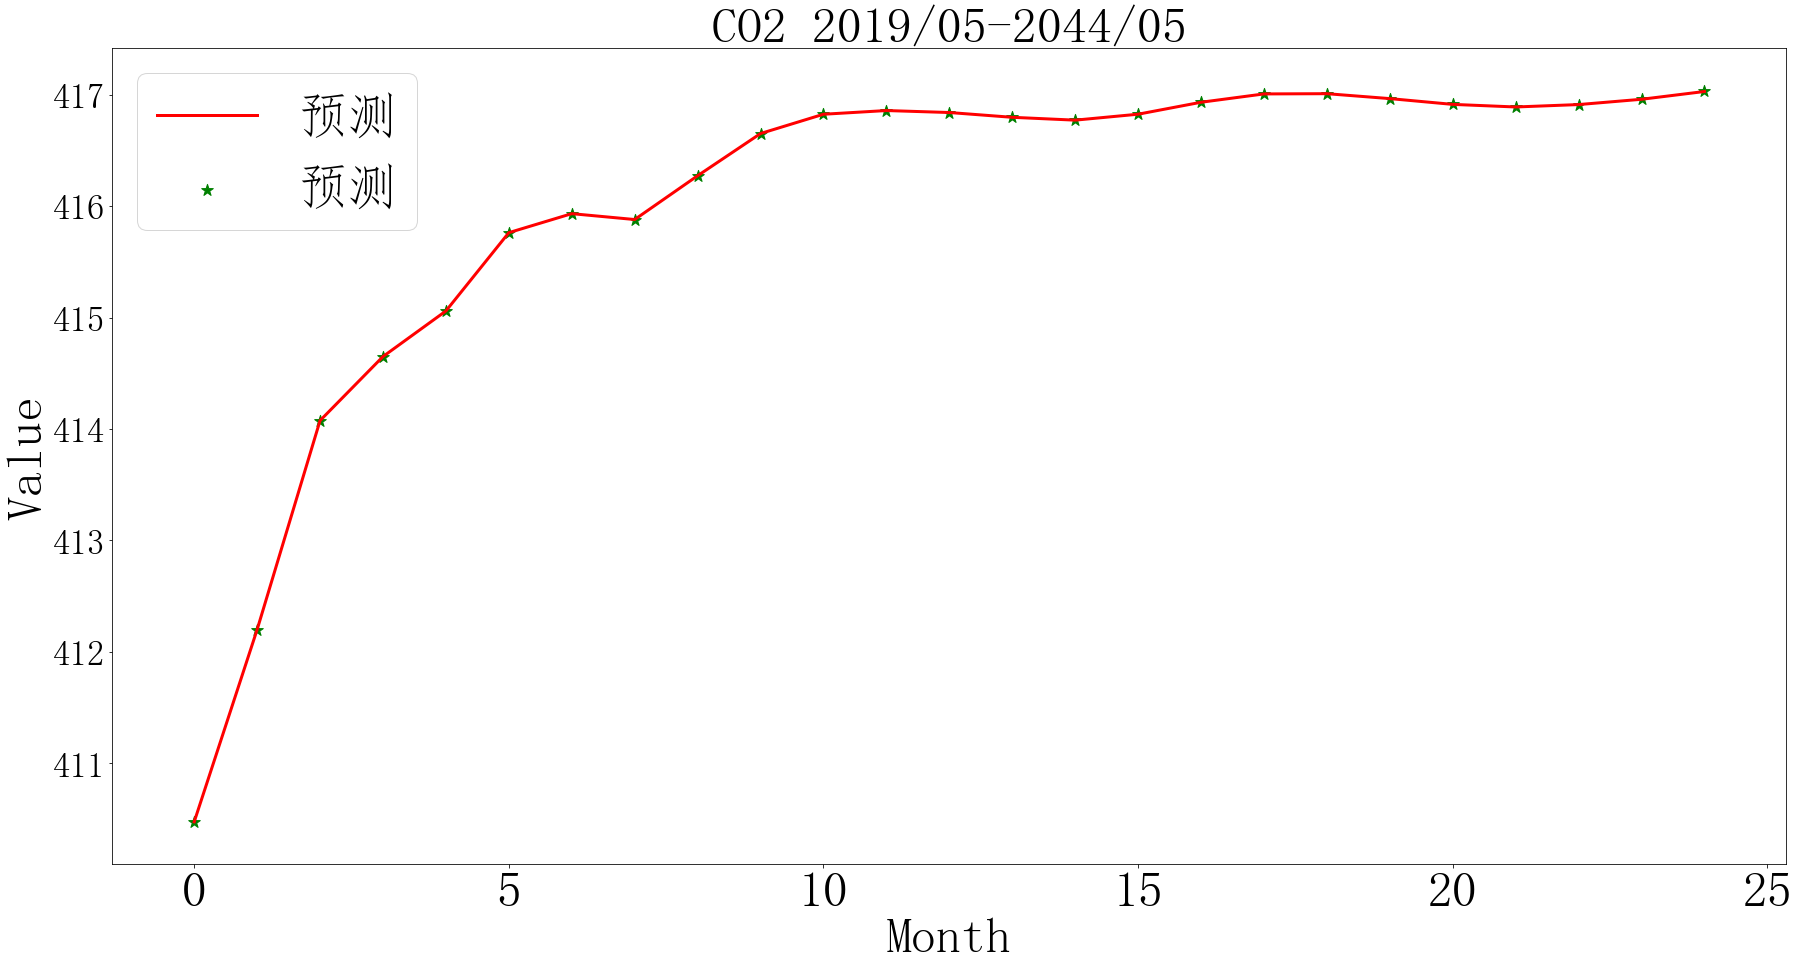

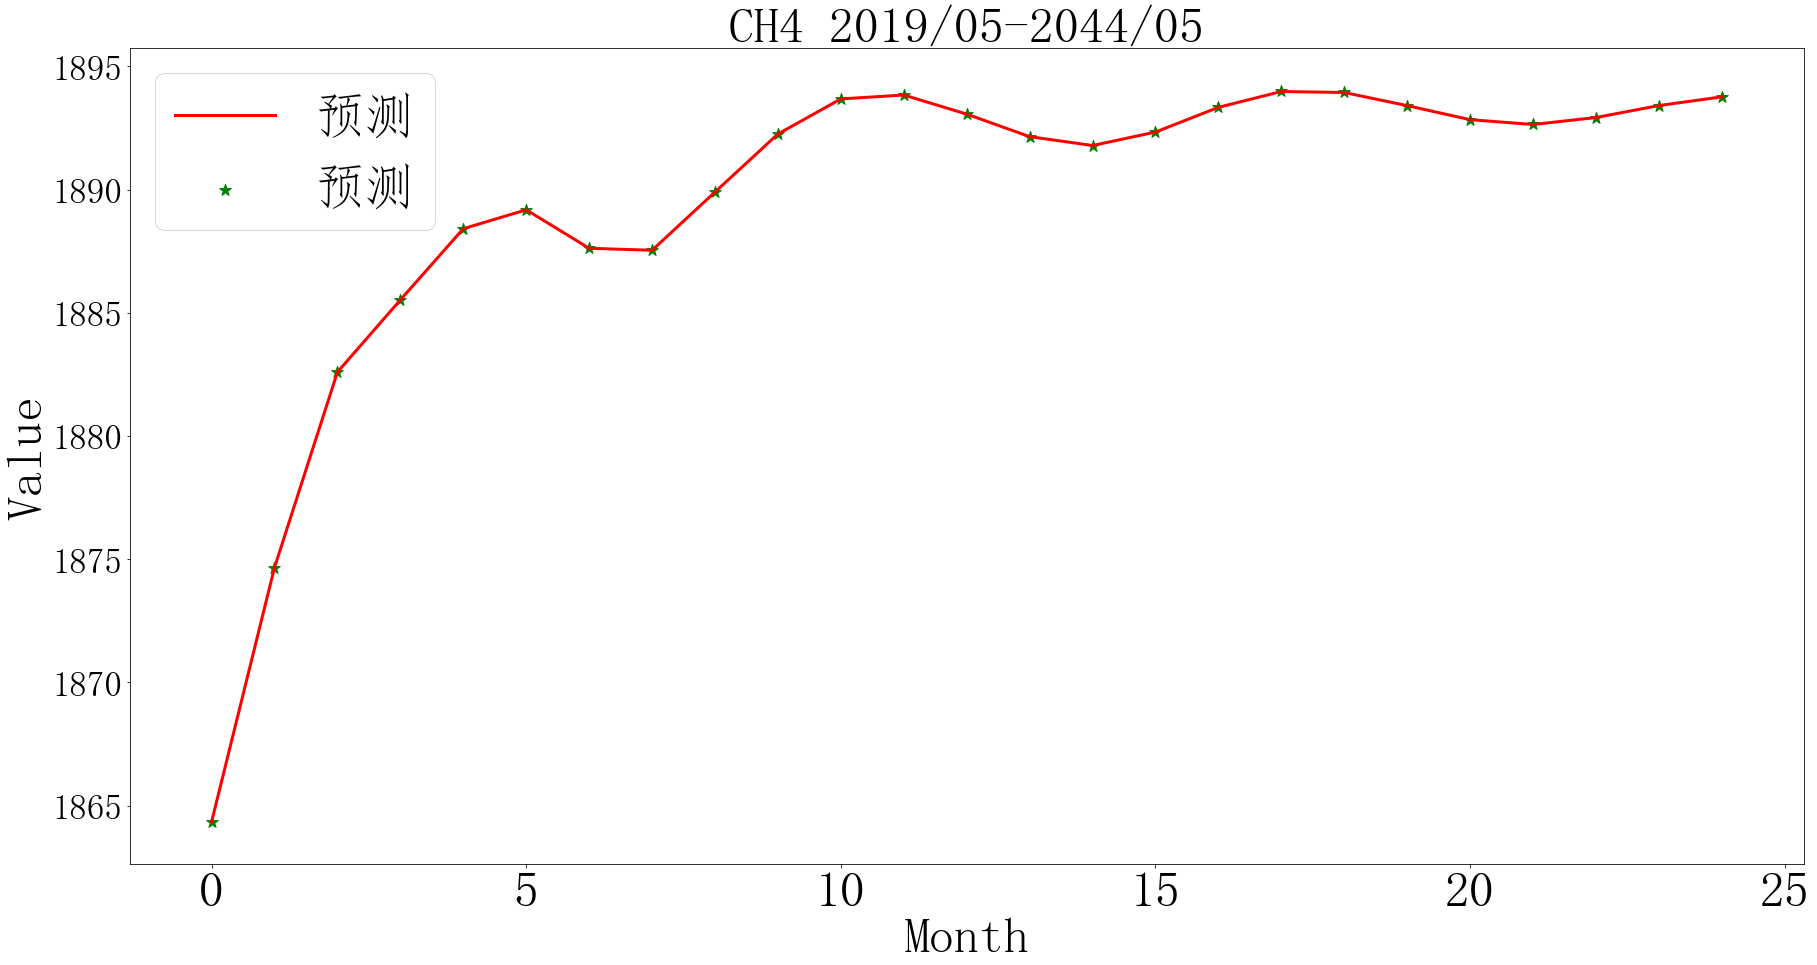

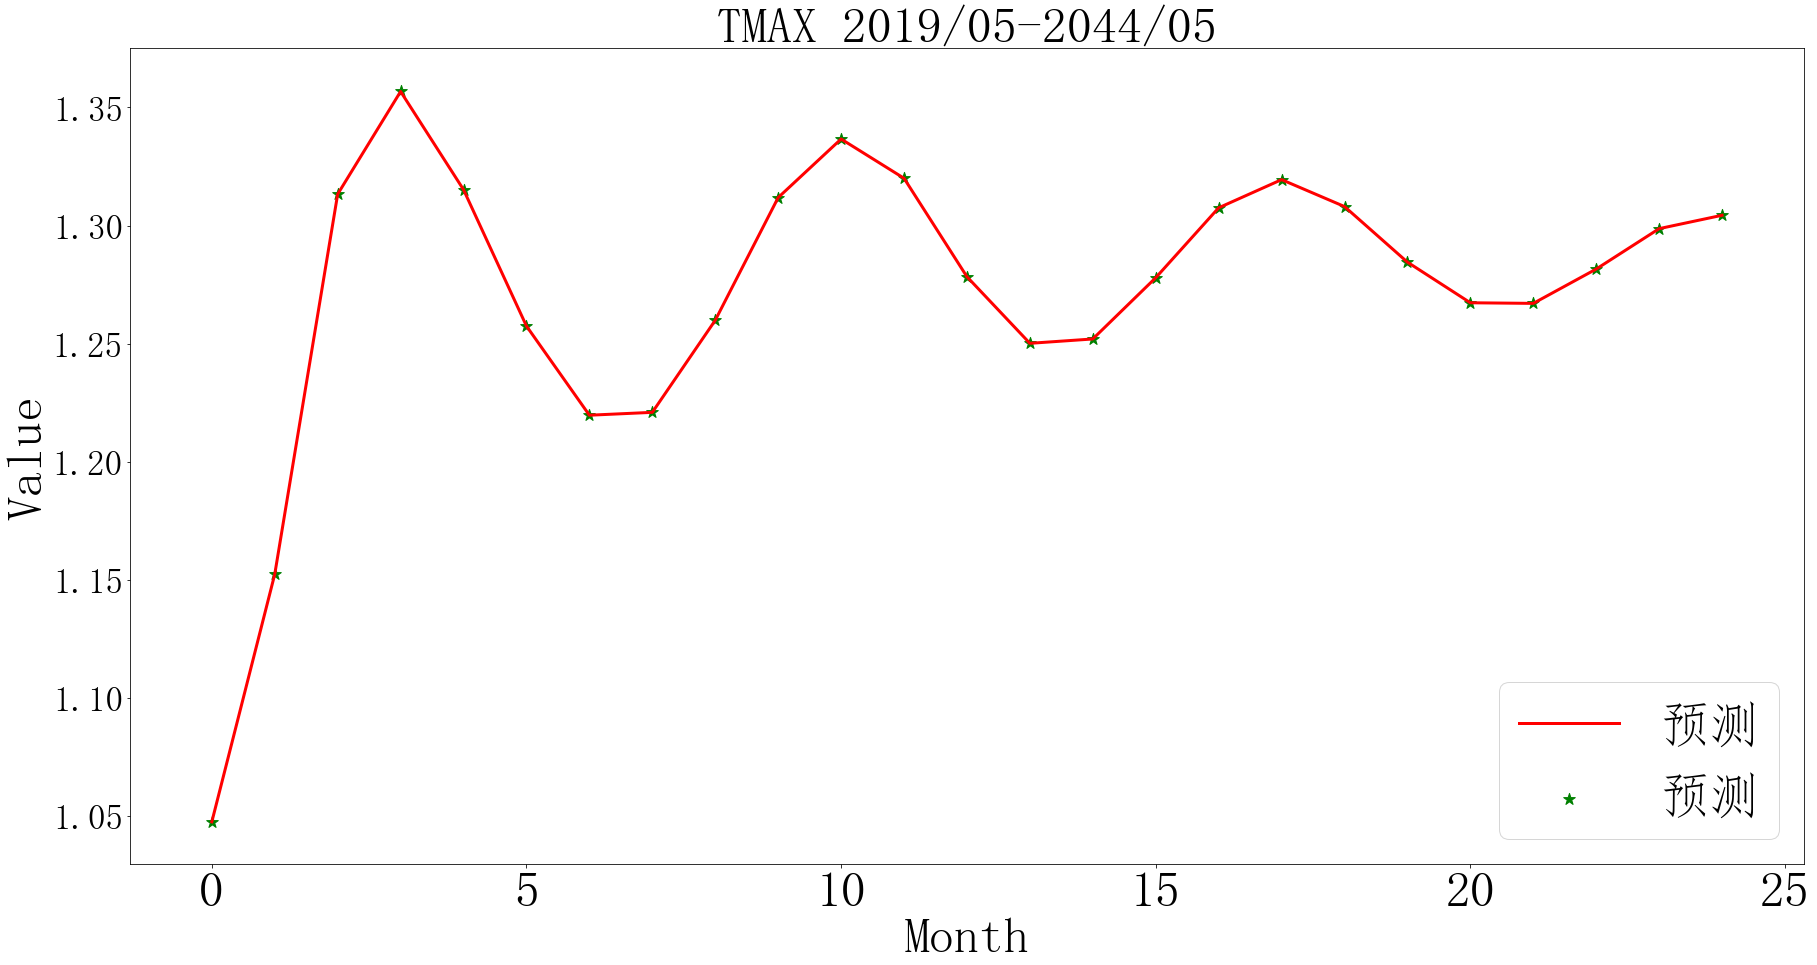

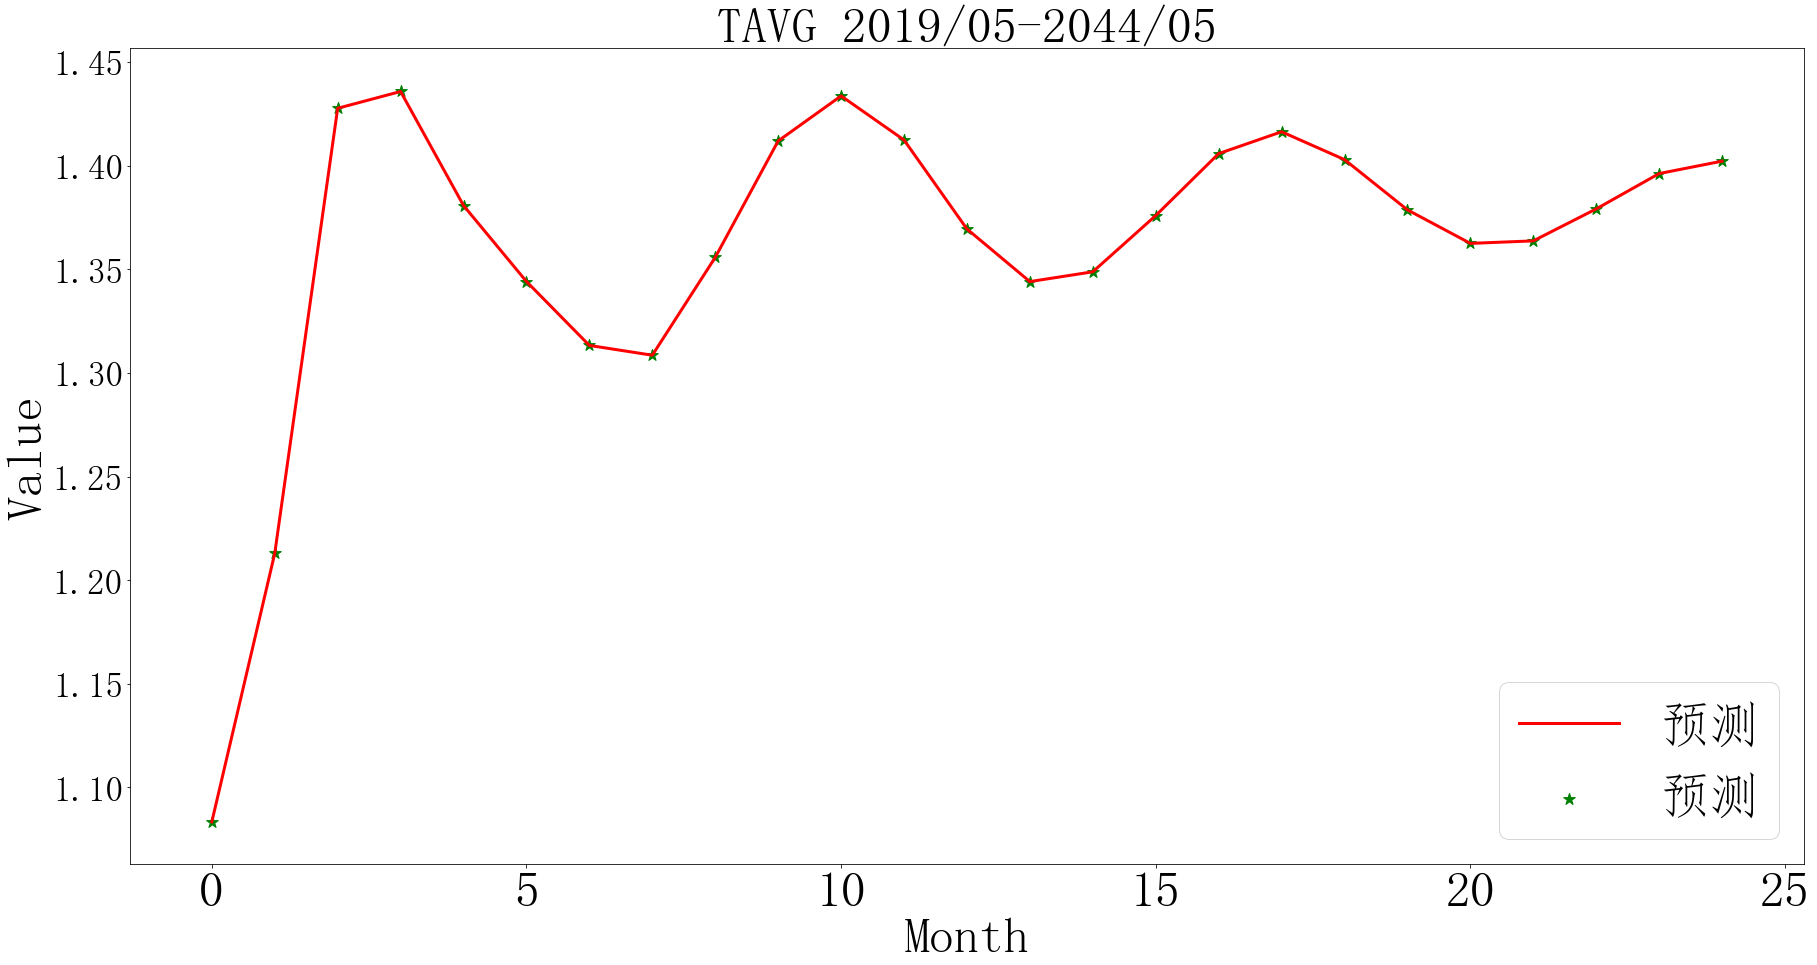

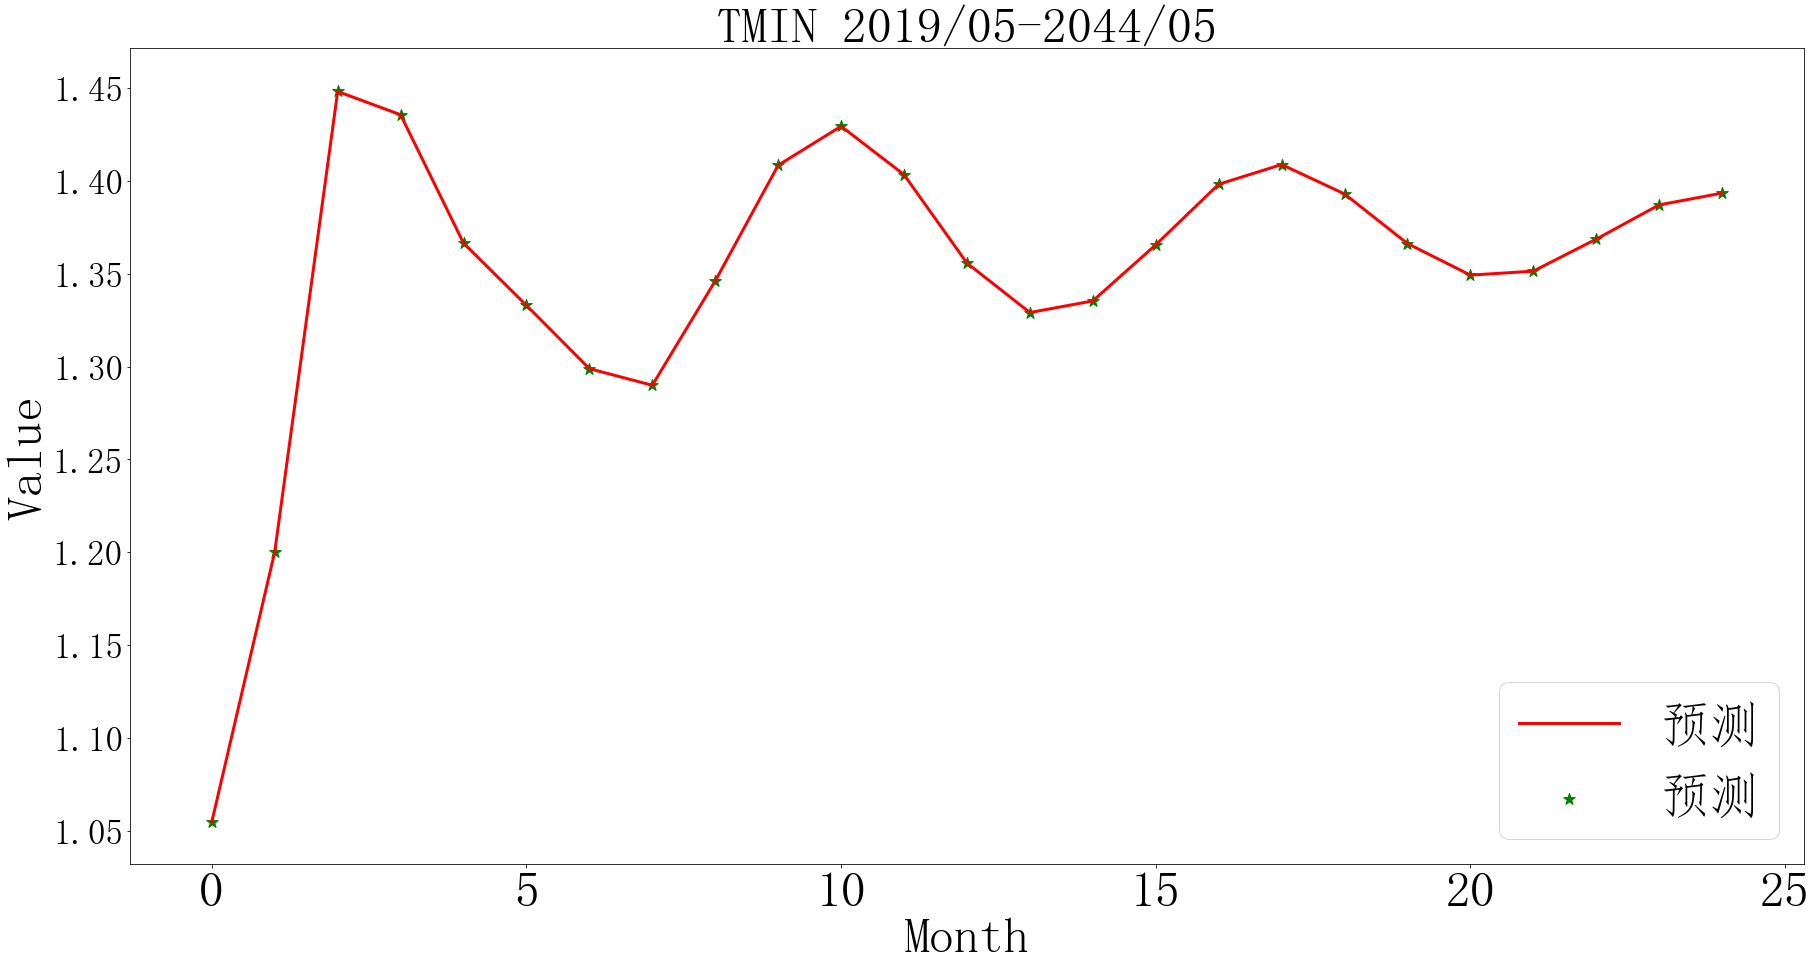

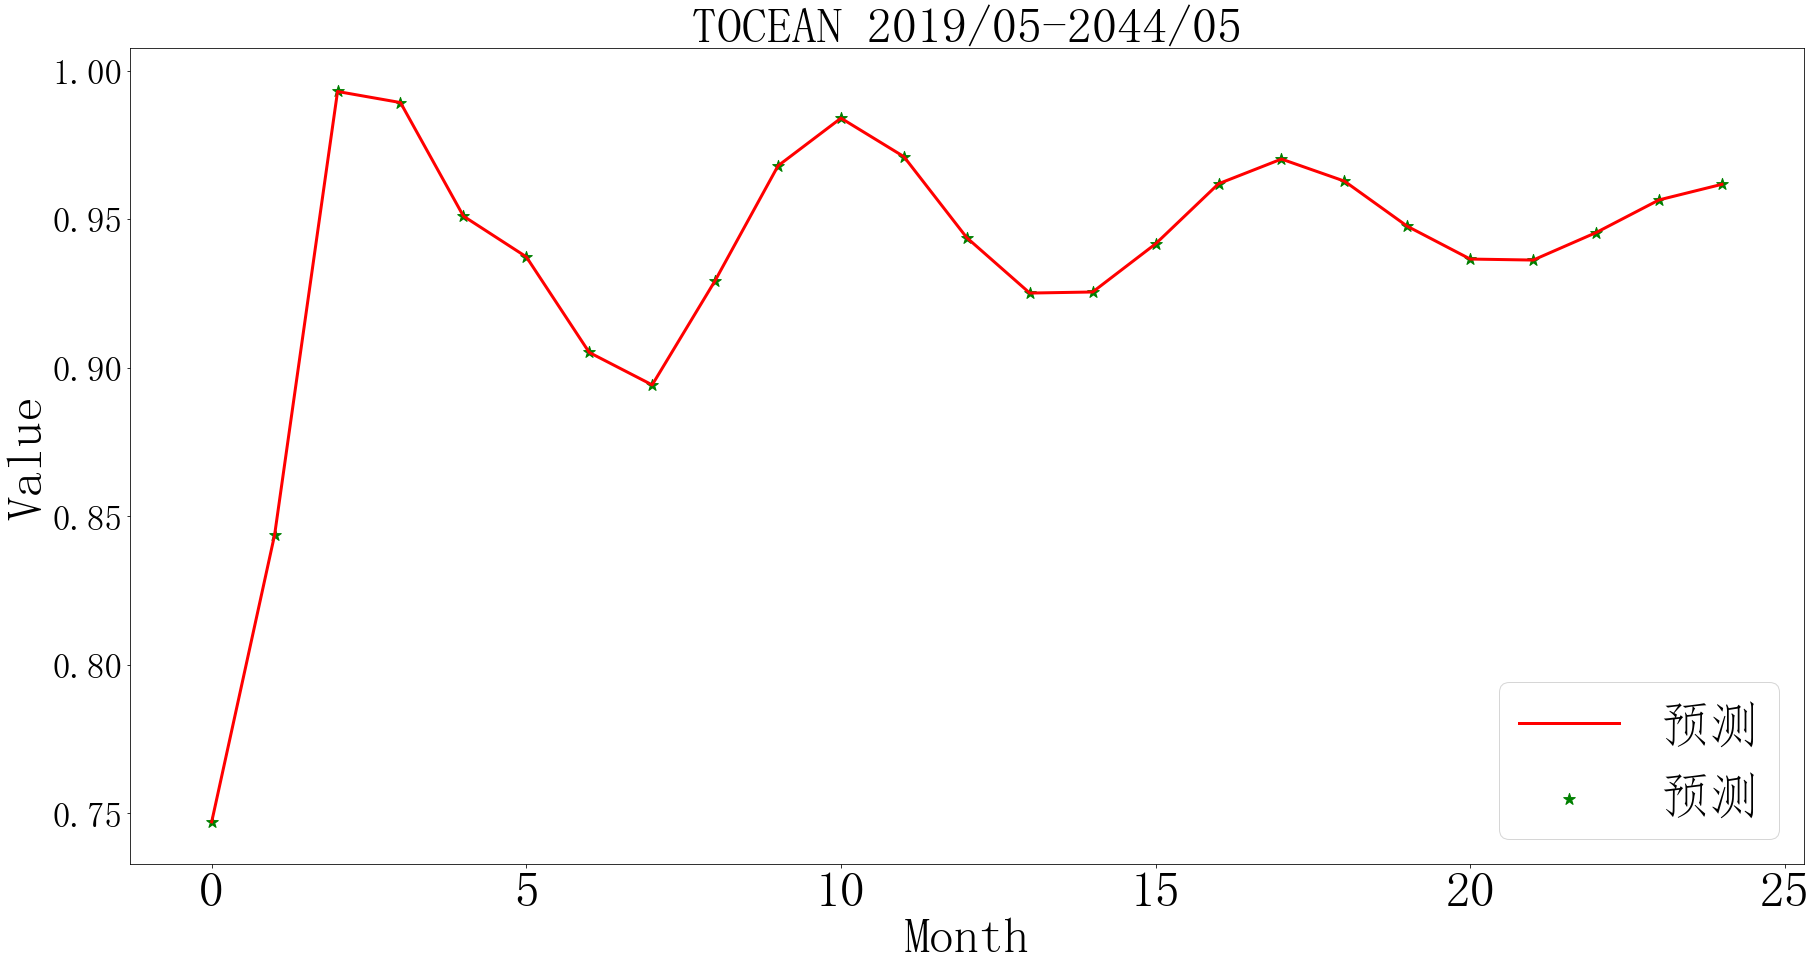

In [18]:
x=np.zeros((len(inv_pred_y)//12,1))
for i in range(len(x)):
    x[i]=i
y=np.zeros((inv_pred_y.shape[0]//12,inv_pred_y.shape[1]))

for i in range(0,300,4):
    y[i//12]=np.mean(inv_pred_y[i:i+12,:],axis=0)

print(x.shape,y.shape)
for i in groups:
    # 绘制历史数据和预测数据图
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(y[:,i-1],label='预测',c='r',linestyle='-', linewidth=3)
    plt.scatter(x,y[:,i-1],label='预测',c='g',linestyle='-', marker='*',s=150)
    plt.legend(prop={'size':50})

    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
    plt.xlabel("year",fontsize=50)
    plt.ylabel("Value",fontsize=50)
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)
#     plt.title(fontdict=50)
    plt.savefig('{}25niandu.png'.format(dataset.columns[i]),dpi=200)
    plt.show()
# 计算RMSE